In [1]:
%run "Data Prepration.ipynb"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# PROFITABILITY  ANALYSIS

##  (a)  Most and Least Profitable Zones and Product Categories

###                  Profit = Revenue − Cost of Goods Sold

In [3]:
merged_data['profit']=merged_data['revenue'] - merged_data['cost_of_goods_sold']

In [4]:
profit_zone_wise=merged_data.groupby('zone')['profit'].sum().reset_index()
profit_product_wise=merged_data.groupby('product_category')['profit'].sum().reset_index()

In [5]:
profit_zone_wise_sorted=profit_zone_wise.sort_values(by='profit', ascending=False)
profit_product_wise_sorted=profit_product_wise.sort_values(by='profit' , ascending=False)

In [6]:
print("Most Profitable Zones:\n", profit_zone_wise_sorted.head())
print("Least Profitable Zones:\n", profit_zone_wise_sorted.tail())
print("Most Profitable Product Categories:\n", profit_product_wise_sorted.head())
print("Least Profitable Product Categories:\n", profit_product_wise_sorted.tail())


Most Profitable Zones:
     zone        profit
0   East  7.014132e+08
2  South  6.886608e+08
1  North  6.639268e+08
3   West  6.181730e+08
Least Profitable Zones:
     zone        profit
0   East  7.014132e+08
2  South  6.886608e+08
1  North  6.639268e+08
3   West  6.181730e+08
Most Profitable Product Categories:
     product_category        profit
0  Carbonated Drinks  9.658818e+08
2              Water  9.298589e+08
1             Juices  7.764332e+08
Least Profitable Product Categories:
     product_category        profit
0  Carbonated Drinks  9.658818e+08
2              Water  9.298589e+08
1             Juices  7.764332e+08


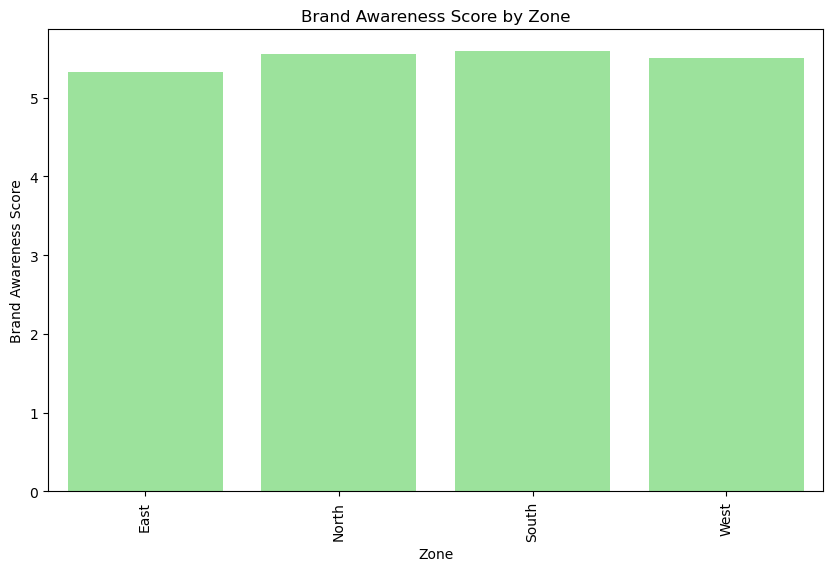

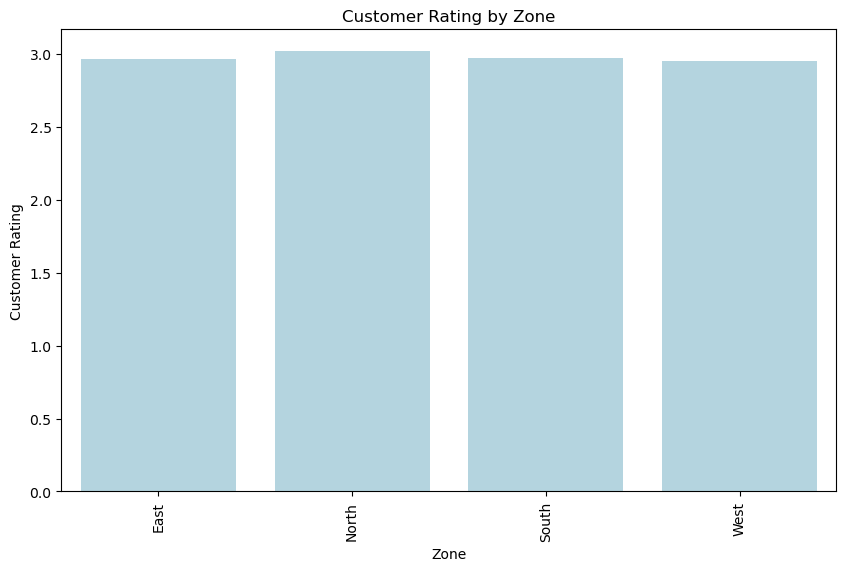

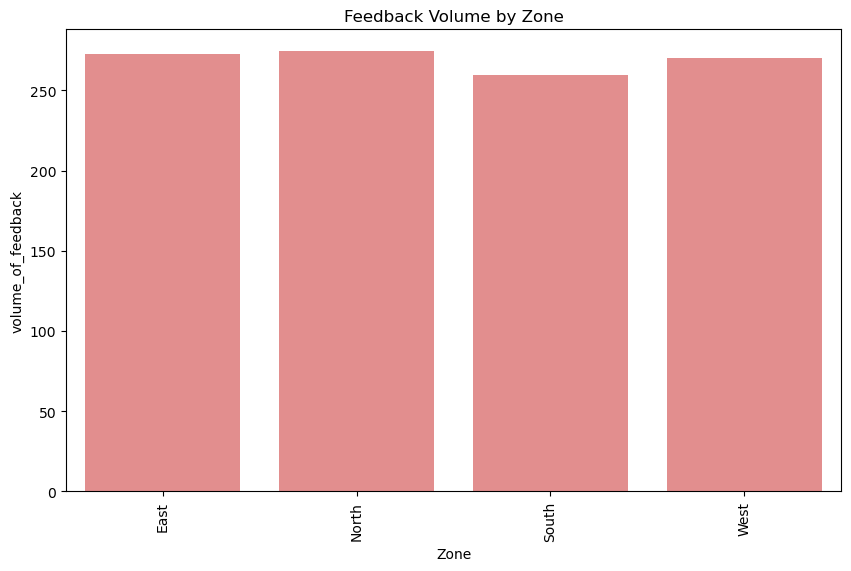

In [7]:

brand_popularity_by_zone = merged_data.groupby('zone')[['brand_awareness_score', 'customer_rating','volume_of_feedback']].mean().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(x='zone', y='brand_awareness_score', data=brand_popularity_by_zone, color='lightgreen')
plt.title('Brand Awareness Score by Zone')
plt.xlabel('Zone')
plt.ylabel('Brand Awareness Score')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='zone', y='customer_rating', data=brand_popularity_by_zone, color='lightblue')
plt.title('Customer Rating by Zone')
plt.xlabel('Zone')
plt.ylabel('Customer Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='zone', y='volume_of_feedback', data=brand_popularity_by_zone, color='lightcoral')
plt.title('Feedback Volume by Zone')
plt.xlabel('Zone')
plt.ylabel('volume_of_feedback')
plt.xticks(rotation=90)
plt.show()


In [8]:
merged_data.head()

,country,zone,product_id,product_category,units_sold,revenue,cost_of_goods_sold,date,marketing_spend,campaign_type,customer_reach,brand_awareness_score,customer_rating,feedback_type,volume_of_feedback,competitor_name,competitor_product_category,competitor_price,competitor_market_share,profit
0,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_C,Water,6.74,49.34,1908.81
1,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_A,Juices,1.46,24.03,1908.81
2,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_A,Water,1.46,36.02,1908.81
3,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_C,Carbonated Drinks,4.46,21.67,1908.81
4,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_C,Carbonated Drinks,8.75,22.76,1908.81


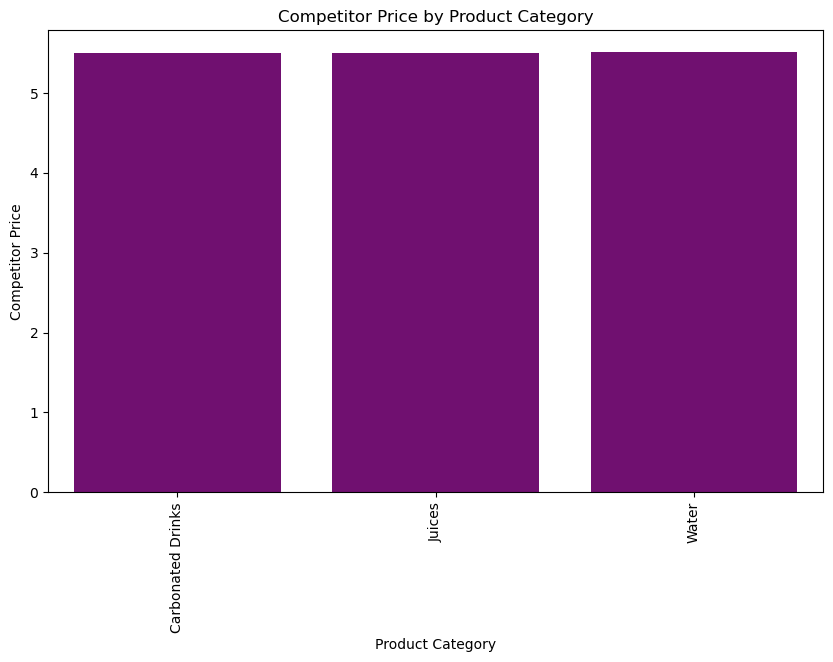

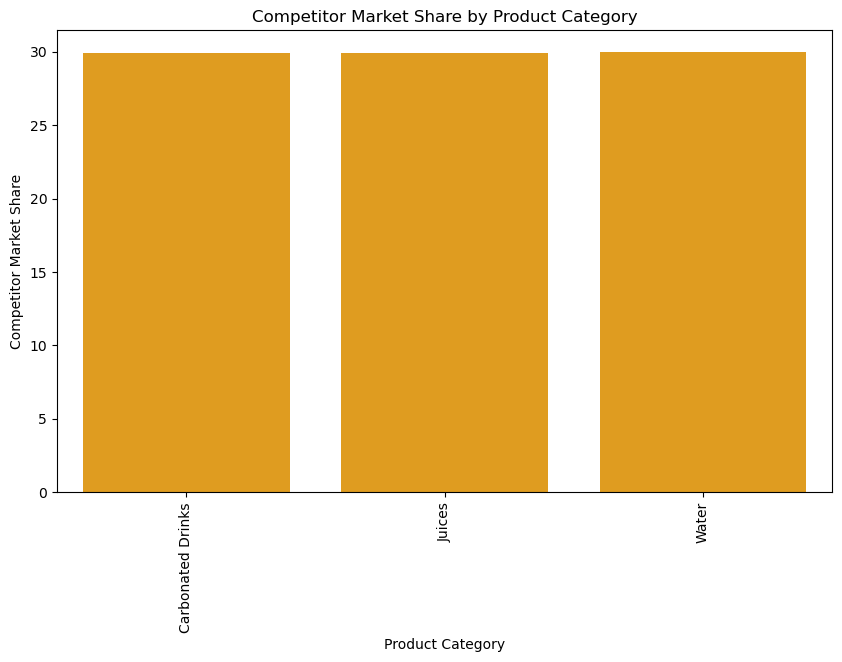

In [9]:

competitor_comparison = merged_data.groupby('product_category')[['competitor_price', 'competitor_market_share']].mean().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(x='product_category', y='competitor_price', data=competitor_comparison, color='purple')
plt.title('Competitor Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Competitor Price')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='product_category', y='competitor_market_share', data=competitor_comparison, color='orange')
plt.title('Competitor Market Share by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Competitor Market Share')
plt.xticks(rotation=90)
plt.show()


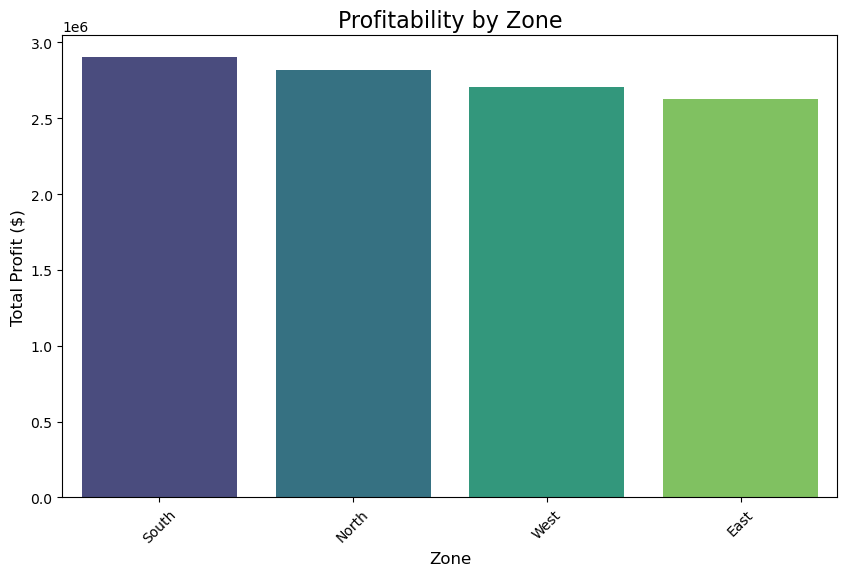

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sales_data['profit'] = sales_data['revenue'] - sales_data['cost_of_goods_sold']


profit_by_zone = sales_data.groupby('zone')['profit'].sum().sort_values(ascending=False)
profit_by_category = sales_data.groupby('product_category')['profit'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_zone.index, y=profit_by_zone.values, palette='viridis')
plt.title('Profitability by Zone', fontsize=16)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()



# Insights from these graphs will follow.


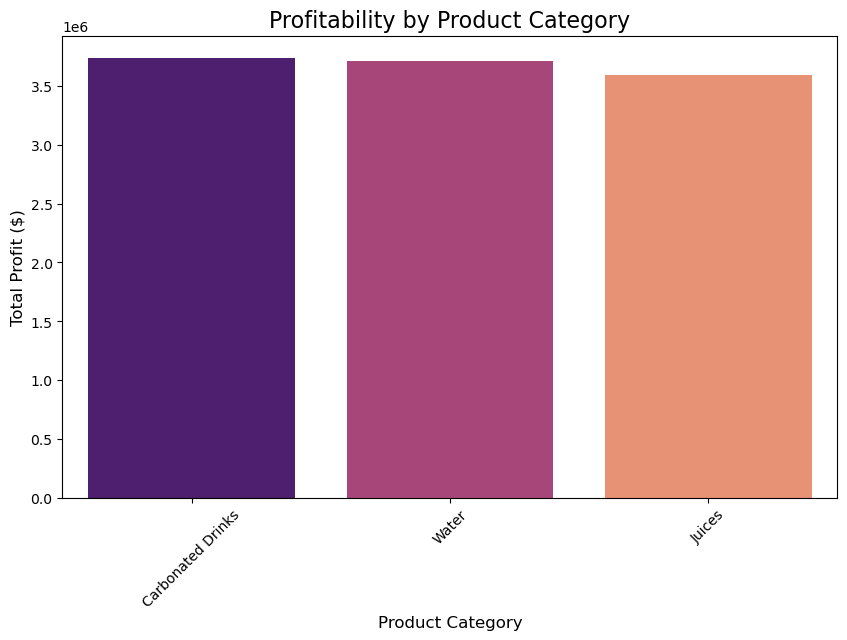

In [11]:

plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette='magma')
plt.title('Profitability by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# BRAND   POPULARITY

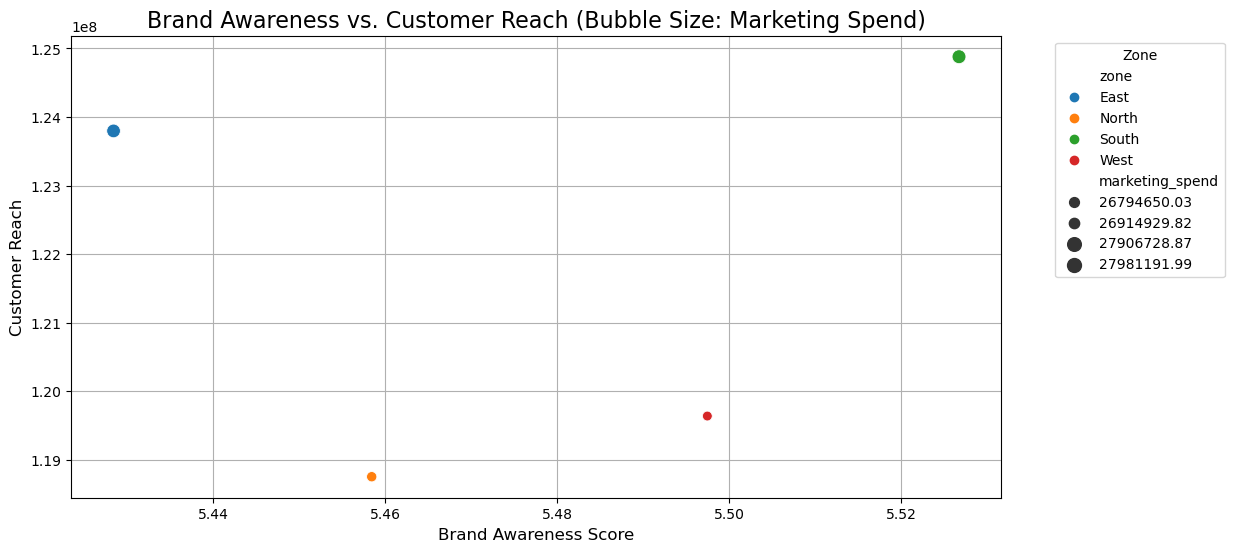

In [12]:

brand_popularity = marketing_data.groupby('zone').agg({
    'brand_awareness_score': 'mean',
    'customer_reach': 'sum',
    'marketing_spend': 'sum'
}).reset_index()


plt.figure(figsize=(12, 6))
sns.scatterplot(data=brand_popularity, x='brand_awareness_score', y='customer_reach', 
                size='marketing_spend', hue='zone', palette='tab10', sizes=(50, 100))
plt.title('Brand Awareness vs. Customer Reach (Bubble Size: Marketing Spend)', fontsize=16)
plt.xlabel('Brand Awareness Score', fontsize=12)
plt.ylabel('Customer Reach', fontsize=12)
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [13]:
import pandas as pd

# Load the Excel file and inspect the sheets
file_path = "Command Centre Dataset.xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets into DataFrames
sales_data = pd.read_excel(xls, sheet_name="Sales_Data")
marketing_data = pd.read_excel(xls, sheet_name="Marketing_Data")
customer_feedback = pd.read_excel(xls, sheet_name="Customer_Feedback_Data")
competitor_data = pd.read_excel(xls, sheet_name="Competitor_Data")

# Add a Profit column to the sales data
sales_data["Profit"] = sales_data["Revenue"] - sales_data["Cost_of_Goods_Sold"]

# Group by Zone and Product_Category for Profitability Analysis
profit_by_zone = sales_data.groupby("Zone")["Profit"].sum().sort_values(ascending=False)
profit_by_category = sales_data.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)

# Summarize profitability insights
most_profitable_zone = profit_by_zone.idxmax()
least_profitable_zone = profit_by_zone.idxmin()
most_profitable_category = profit_by_category.idxmax()
least_profitable_category = profit_by_category.idxmin()

# Analyze Brand Popularity
brand_popularity = marketing_data.groupby("Zone").agg(
    Brand_Awareness_Score=("Brand_Awareness_Score", "mean"),
    Customer_Reach=("Customer_Reach", "mean")
).sort_values(by="Brand_Awareness_Score", ascending=False)

# Summarize key brand insights
zone_highest_awareness = brand_popularity.index[0]
zone_lowest_awareness = brand_popularity.index[-1]

# Extract results for profitability and brand popularity
result = {
    "Profit by Zone": profit_by_zone,
    "Profit by Category": profit_by_category,
    "Most Profitable Zone": most_profitable_zone,
    "Least Profitable Zone": least_profitable_zone,
    "Most Profitable Category": most_profitable_category,
    "Least Profitable Category": least_profitable_category,
    "Brand Popularity by Zone": brand_popularity,
    "Zone with Highest Brand Awareness": zone_highest_awareness,
    "Zone with Lowest Brand Awareness": zone_lowest_awareness
}

# Displaying the results
for key, value in result.items():
    print(f"\n{key}:\n{value}")



Profit by Zone:
Zone
South    2901432.86
North    2817640.39
West     2705071.92
East     2629417.14
Name: Profit, dtype: float64

Profit by Category:
Product_Category
Carbonated Drinks    3743454.23
Water                3718060.61
Juices               3592047.47
Name: Profit, dtype: float64

Most Profitable Zone:
South

Least Profitable Zone:
East

Most Profitable Category:
Carbonated Drinks

Least Profitable Category:
Juices

Brand Popularity by Zone:
       Brand_Awareness_Score  Customer_Reach
Zone                                        
South               5.526714    55601.013802
West                5.497462    55209.901707
North               5.458450    55441.112979
East                5.428443    55539.618214

Zone with Highest Brand Awareness:
South

Zone with Lowest Brand Awareness:
East


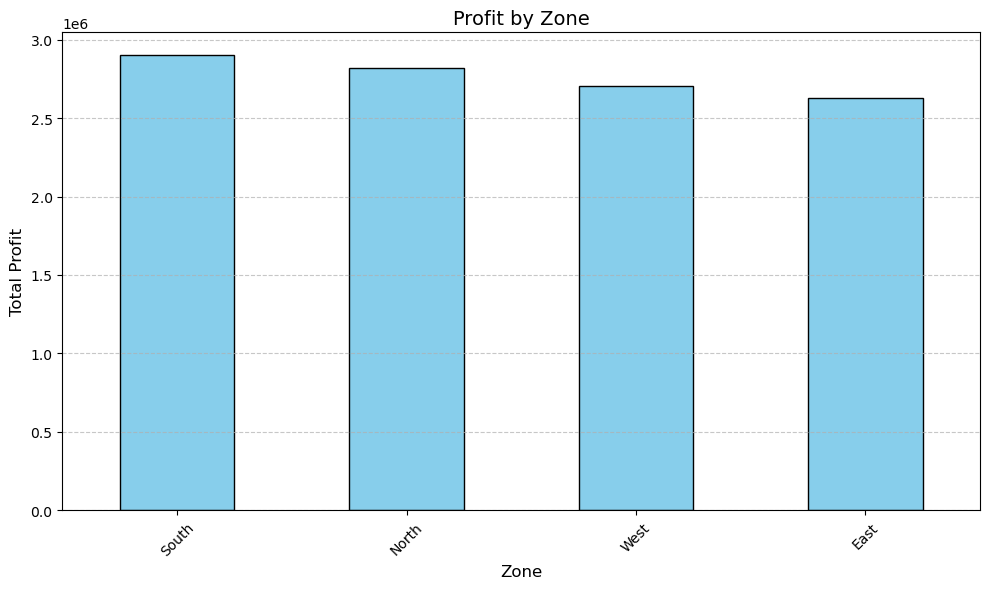

In [14]:
import matplotlib.pyplot as plt

# Plot 1: Profit by Zone
plt.figure(figsize=(10, 6))
profit_by_zone.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Profit by Zone", fontsize=14)
plt.xlabel("Zone", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()








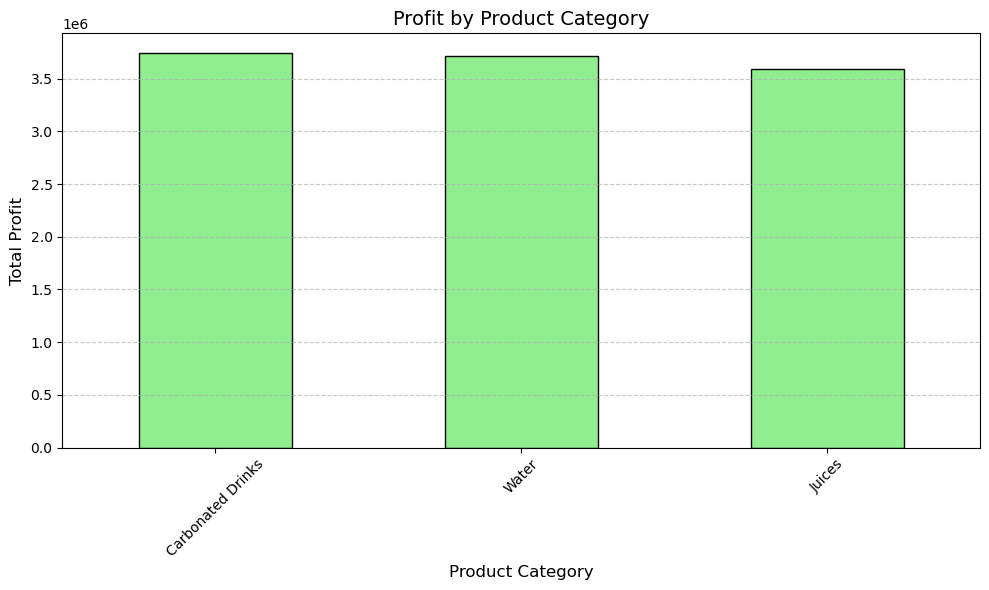

In [15]:
# Plot 2: Profit by Product Category
plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Profit by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

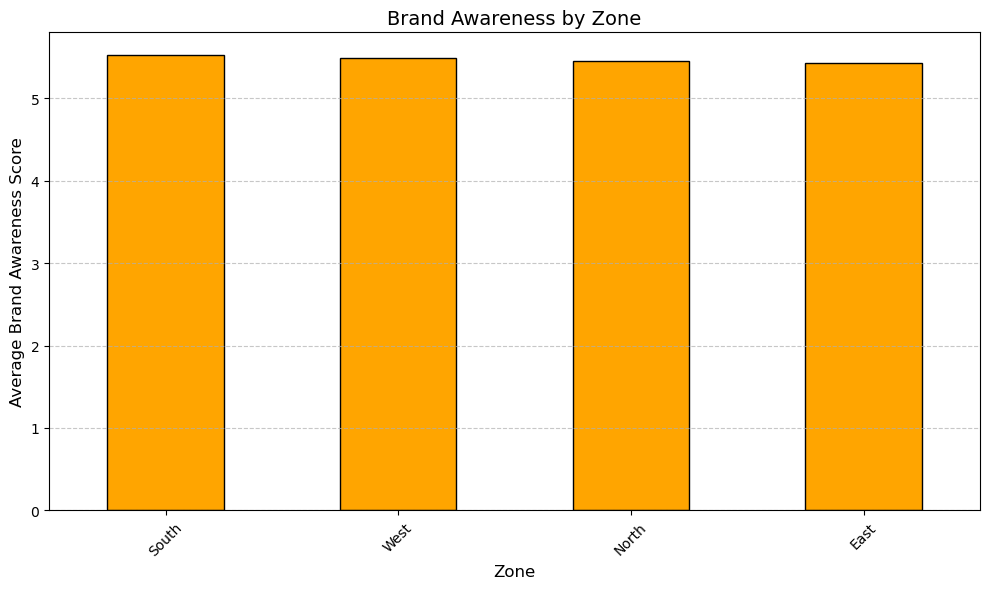

In [16]:
# Plot 3: Brand Awareness by Zone
plt.figure(figsize=(10, 6))
brand_popularity["Brand_Awareness_Score"].plot(kind='bar', color='orange', edgecolor='black')
plt.title("Brand Awareness by Zone", fontsize=14)
plt.xlabel("Zone", fontsize=12)
plt.ylabel("Average Brand Awareness Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

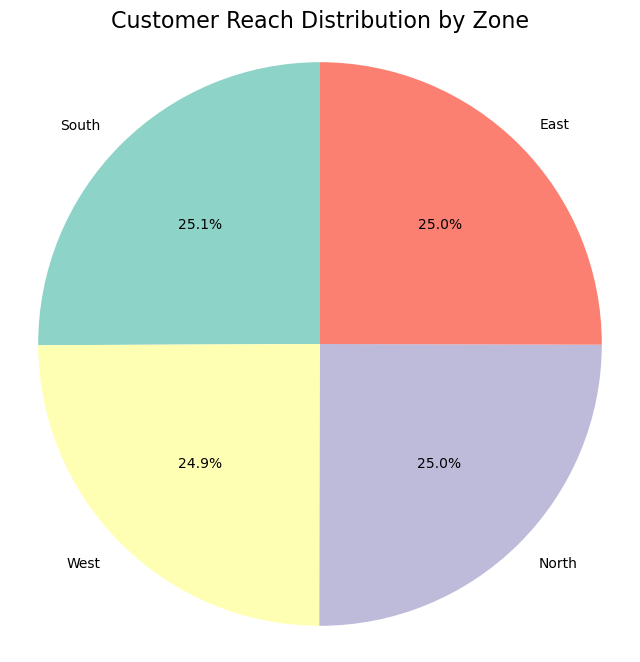

In [19]:
# # Plot 4: Customer Reach by Zone
# plt.figure(figsize=(10, 6))
# brand_popularity["Customer_Reach"].plot(kind='bar', color='purple', edgecolor='black')
# plt.title("Customer Reach by Zone", fontsize=14)
# plt.xlabel("Zone", fontsize=12)
# plt.ylabel("Average Customer Reach", fontsize=12)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Plot Pie Chart for Customer Reach by Zone
# brand_popularity["Customer_Reach"].plot(kind='bar', color='purple', edgecolor='black')
plt.figure(figsize=(8, 8))
customer_reach = brand_popularity['Customer_Reach']
plt.pie(customer_reach, labels=brand_popularity.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(brand_popularity)))
plt.title('Customer Reach Distribution by Zone', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


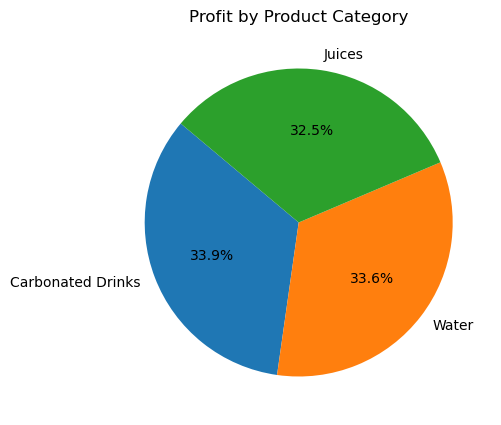

In [18]:
import matplotlib.pyplot as plt

# Data for the profit by category
profit_by_category = {
    'Carbonated Drinks': 3743454.23,
    'Water': 3718060.61,
    'Juices': 3592047.47
}

# Extracting categories and profits for the pie chart
categories = list(profit_by_category.keys())
profits = list(profit_by_category.values())

# Create a pie chart
plt.figure(figsize=(8, 5))
plt.pie(profits, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Profit by Product Category')

# Show the plot
plt.show()


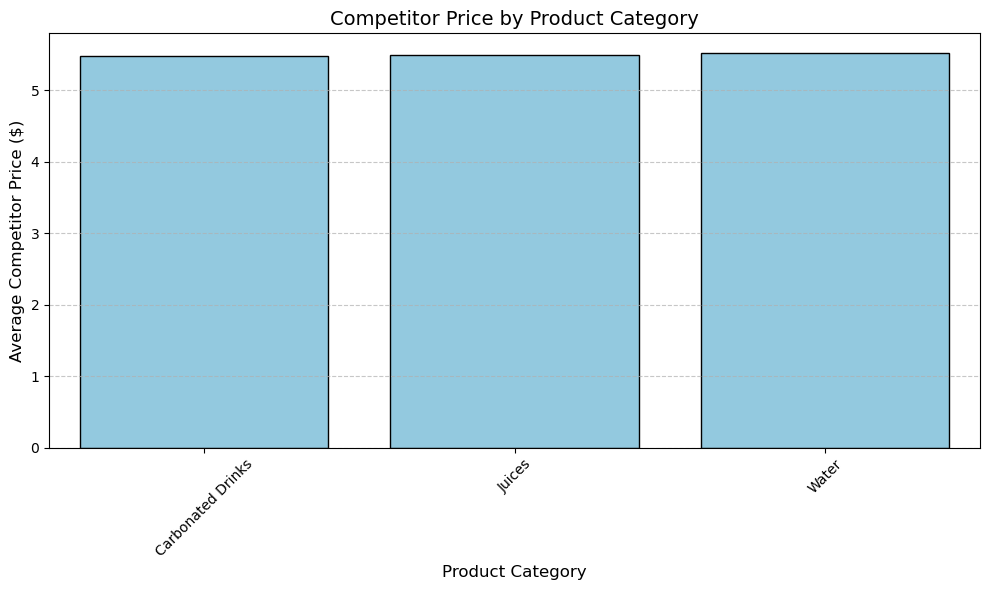

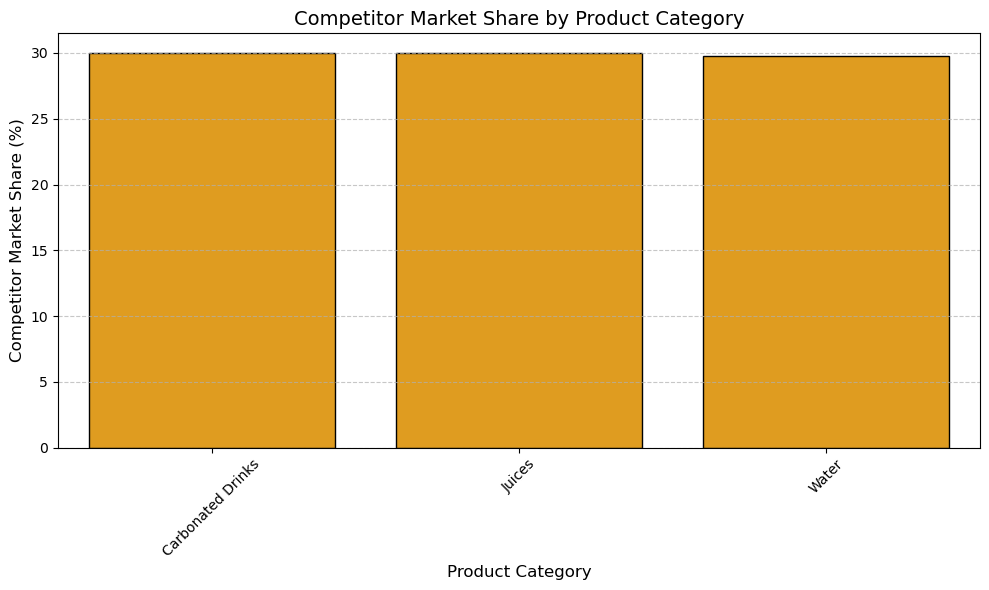

Highest Market Share:
Competitor_Product_Category    Carbonated Drinks
Competitor_Price                        5.480968
Competitor_Market_Share                29.995542
Name: 0, dtype: object

Lowest Market Share:
Competitor_Product_Category        Water
Competitor_Price                5.520647
Competitor_Market_Share        29.776702
Name: 2, dtype: object


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load competitor data into DataFrame
competitor_data = pd.read_excel("Command Centre Dataset.xlsx", sheet_name="Competitor_Data")

# Group by Product Category for competitor metrics
competitor_metrics = competitor_data.groupby('Competitor_Product_Category')[['Competitor_Price', 'Competitor_Market_Share']].mean().reset_index()

# Plot 1: Competitor Price by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Competitor_Product_Category', y='Competitor_Price', data=competitor_metrics, color='skyblue', edgecolor='black')
plt.title('Competitor Price by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Competitor Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Competitor Market Share by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Competitor_Product_Category', y='Competitor_Market_Share', data=competitor_metrics, color='orange', edgecolor='black')
plt.title('Competitor Market Share by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Competitor Market Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Insights or additional metrics (optional):
# Calculate the highest and lowest market share
highest_share = competitor_metrics.loc[competitor_metrics['Competitor_Market_Share'].idxmax()]
lowest_share = competitor_metrics.loc[competitor_metrics['Competitor_Market_Share'].idxmin()]

print("Highest Market Share:")
print(highest_share)
print("\nLowest Market Share:")
print(lowest_share)


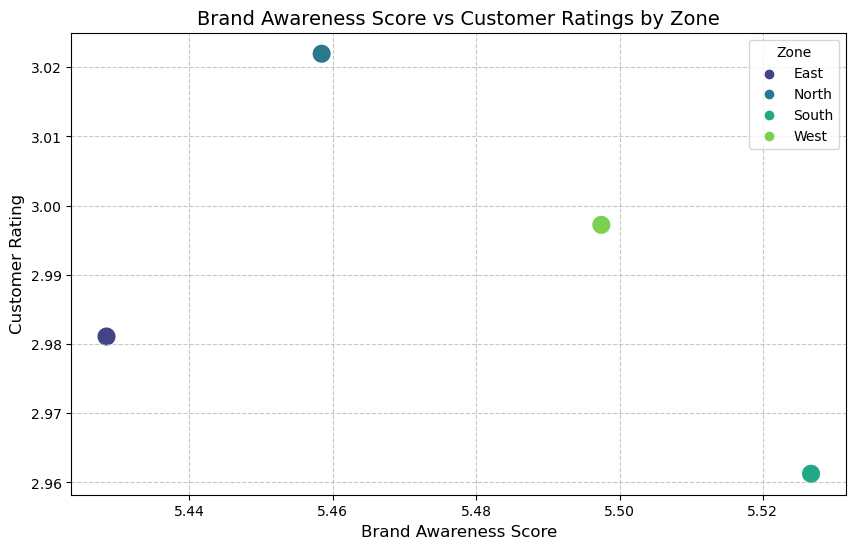

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "Command Centre Dataset.xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets into DataFrames
marketing_data = pd.read_excel(xls, sheet_name="Marketing_Data")
customer_feedback = pd.read_excel(xls, sheet_name="Customer_Feedback_Data")

# Aggregate data for Brand Awareness and Customer Ratings by Zone
brand_awareness = marketing_data.groupby("Zone")["Brand_Awareness_Score"].mean()
customer_rating = customer_feedback.groupby("Zone")["Customer_Rating"].mean()

# Combine the two into a single DataFrame
df_awareness_ratings = pd.DataFrame({
    "Zone": brand_awareness.index,
    "Brand_Awareness_Score": brand_awareness.values,
    "Customer_Rating": customer_rating.values
})

# Plot Brand Awareness Score vs Customer Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_awareness_ratings,
    x="Brand_Awareness_Score",
    y="Customer_Rating",
    hue="Zone",
    s=200,
    palette="viridis"
)

# Add labels and title
plt.title("Brand Awareness Score vs Customer Ratings by Zone", fontsize=14)
plt.xlabel("Brand Awareness Score", fontsize=12)
plt.ylabel("Customer Rating", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.legend(title="Zone", fontsize=10)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Replace 'dataset.csv' with the actual file name
df = pd.read_csv('Cleaned_Command_Centre_Dataset.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Add a profit column for analysis
df['profit'] = df['revenue'] - df['cost_of_goods_sold']




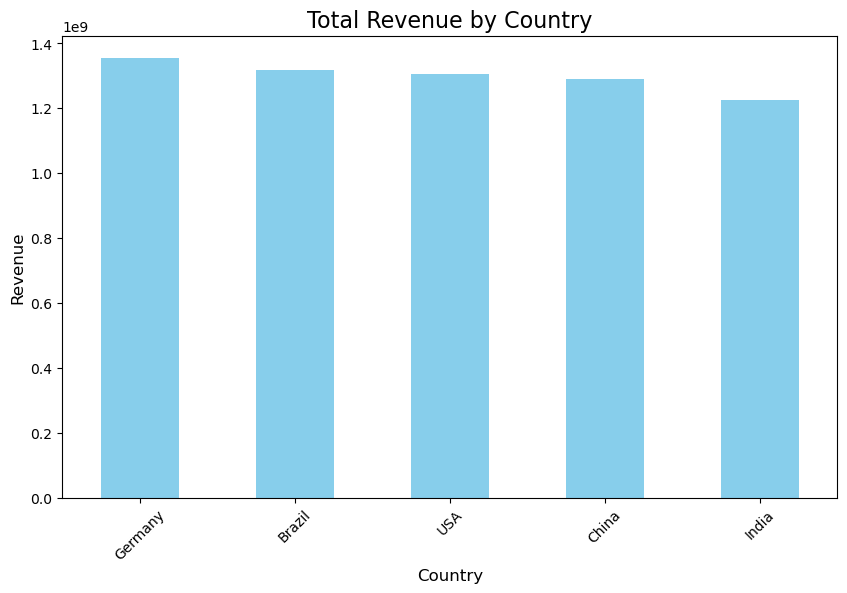

In [2]:
# 1. **Revenue by Country**
plt.figure(figsize=(10, 6))
country_revenue = df.groupby('country')['revenue'].sum().sort_values(ascending=False)
country_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Country', fontsize=16)
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()
# Insight: This highlights the countries contributing most to revenue. Low revenue countries can be analyzed for marketing improvements.



/Users/umabisht/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


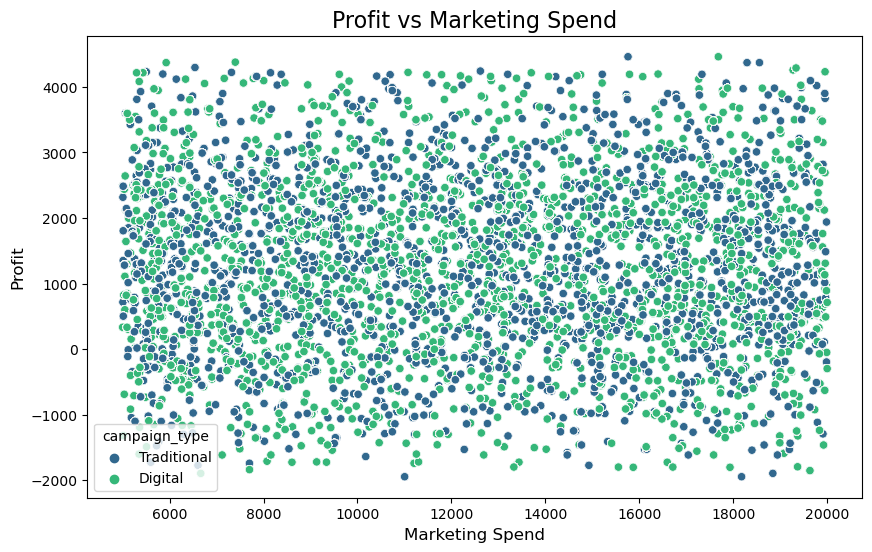

In [12]:
# 2. **Profit vs Marketing Spend**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='marketing_spend', y='profit', hue='campaign_type', palette='viridis')
plt.title('Profit vs Marketing Spend', fontsize=16)
plt.xlabel('Marketing Spend', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()
# Insight: Visualizes the ROI of marketing campaigns. Campaign types can be evaluated for effectiveness.



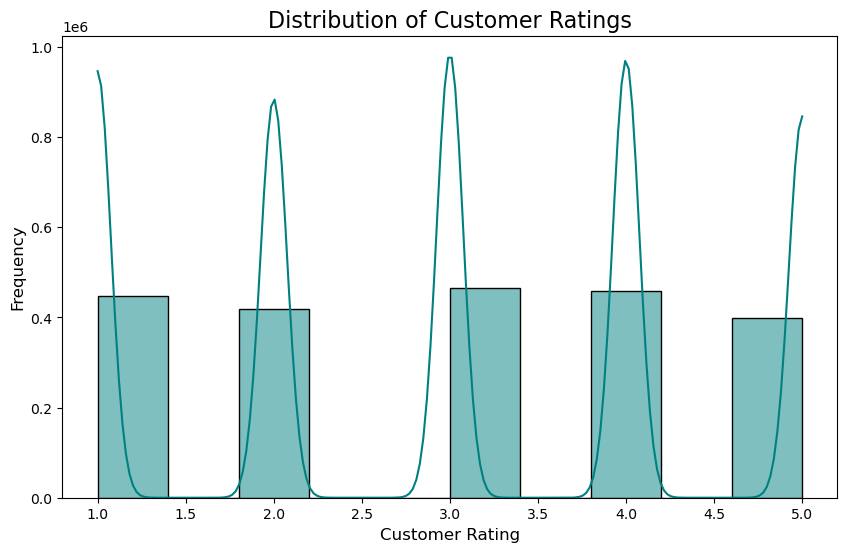

In [4]:
# 3. **Customer Rating Distribution**
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_rating'], bins=10, kde=True, color='teal')
plt.title('Distribution of Customer Ratings', fontsize=16)
plt.xlabel('Customer Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
# Insight: Shows the overall satisfaction level. Low ratings indicate areas to improve in product quality or service.



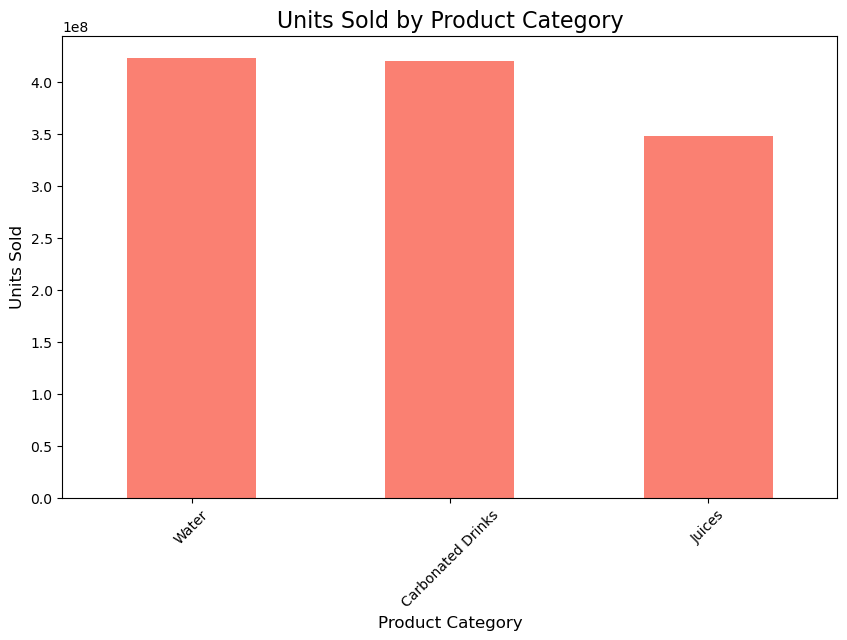

In [5]:
# 4. **Units Sold by Product Category**
plt.figure(figsize=(10, 6))
category_sales = df.groupby('product_category')['units_sold'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='salmon')
plt.title('Units Sold by Product Category', fontsize=16)
plt.ylabel('Units Sold', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()
# Insight: Identifies high-performing product categories. Low-performing categories may need redesign or better marketing.



/Users/umabisht/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


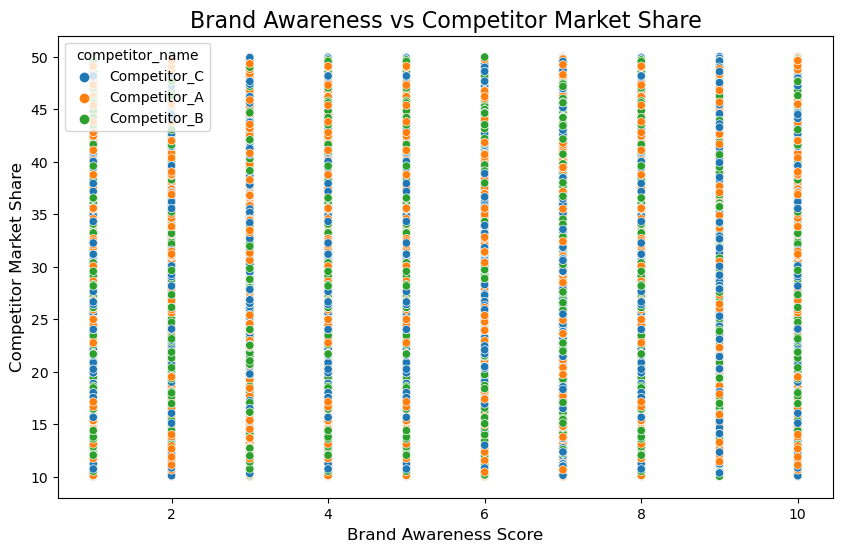

In [11]:
# 5. **Brand Awareness vs Competitor Market Share**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='brand_awareness_score', y='competitor_market_share', hue='competitor_name', palette='tab10')
plt.title('Brand Awareness vs Competitor Market Share', fontsize=16)
plt.xlabel('Brand Awareness Score', fontsize=12)
plt.ylabel('Competitor Market Share', fontsize=12)
plt.show()
# Insight: Evaluates how brand awareness correlates with competition. Low awareness in high-competition areas is a red flag.



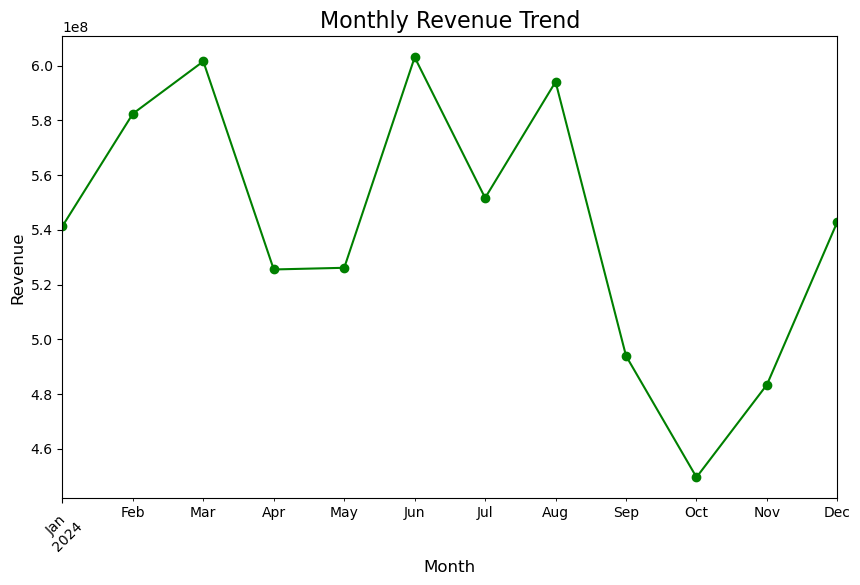

In [7]:
# 6. **Monthly Revenue Trend**
df['month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.show()
# Insight: Identifies seasonal trends. Low revenue months can be targeted for promotional campaigns.



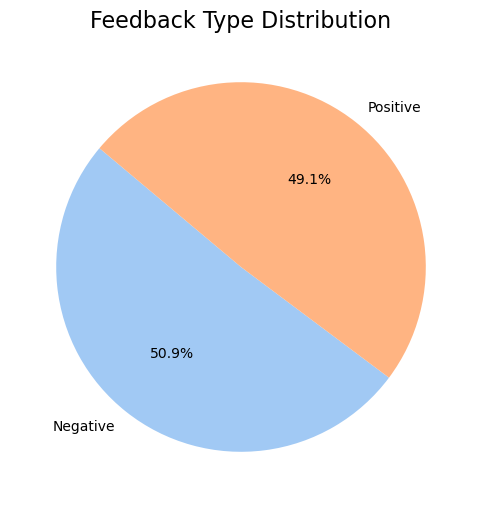

In [8]:
# 7. **Feedback Type Distribution**
plt.figure(figsize=(10, 6))
feedback_counts = df['feedback_type'].value_counts()
feedback_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Feedback Type Distribution', fontsize=16)
plt.ylabel('')
plt.show()
# Insight: Helps understand the proportion of positive and negative feedback.



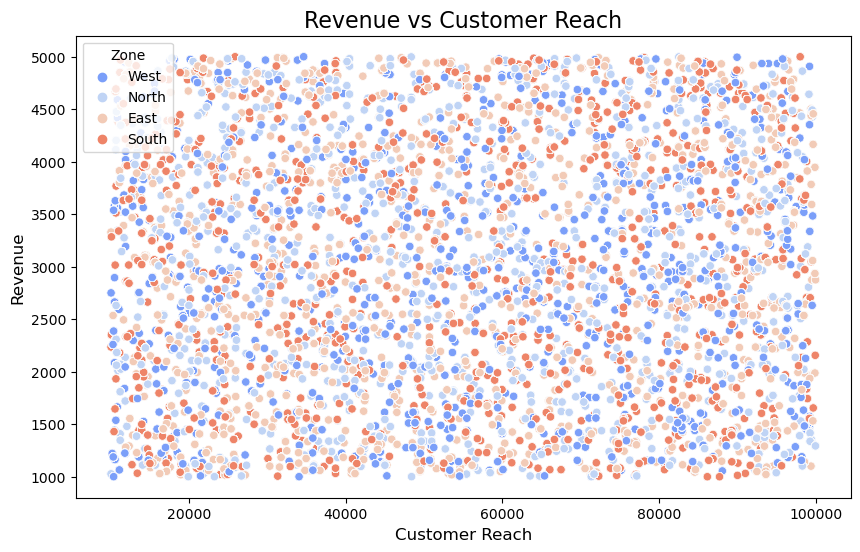

In [10]:
# 8. **Revenue vs Customer Reach**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='customer_reach', y='revenue', hue='zone', palette='coolwarm')
plt.legend(loc='upper left', title='Zone')  # Fixed location with title
plt.title('Revenue vs Customer Reach', fontsize=16)
plt.xlabel('Customer Reach', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

# Insight: Understands how reach impacts revenue. Zones with low reach but potential can be targeted.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Replace 'dataset.csv' with the actual file name
data = pd.read_csv('Cleaned_Command_Centre_Dataset.csv')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

In [2]:
def calculate_profit(row):
    return row['revenue'] - row['cost_of_goods_sold']

def calculate_profit_margin(row):
    return (row['revenue'] - row['cost_of_goods_sold']) / row['revenue'] * 100

# Add Profit and Profit Margin columns
data['profit'] = data.apply(calculate_profit, axis=1)
data['profit_margin'] = data.apply(calculate_profit_margin, axis=1)

# Visualization 1: Average Revenue by Country and Product Category

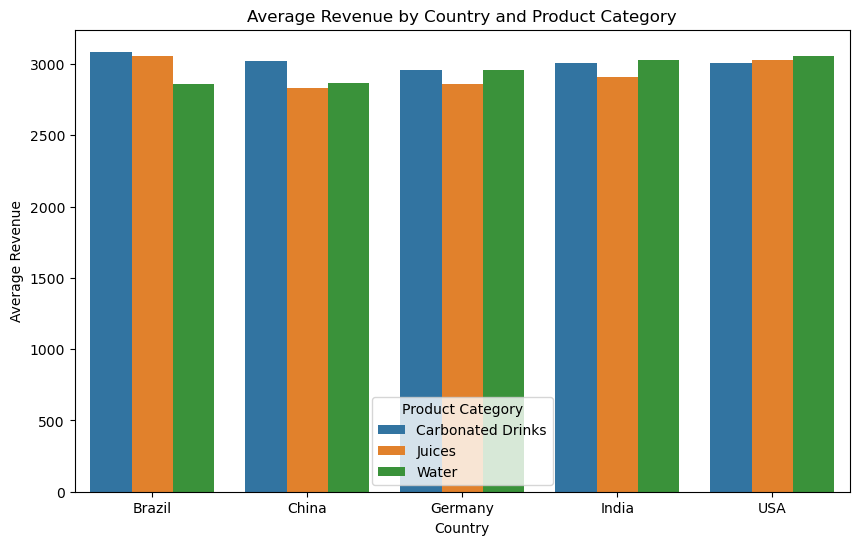

In [3]:

avg_revenue = data.groupby(['country', 'product_category'])['revenue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='revenue', hue='product_category', data=avg_revenue)
plt.title('Average Revenue by Country and Product Category')
plt.ylabel('Average Revenue')
plt.xlabel('Country')
plt.legend(title='Product Category')
plt.show()

# Visualization 2: Feedback Analysis (Percentages)

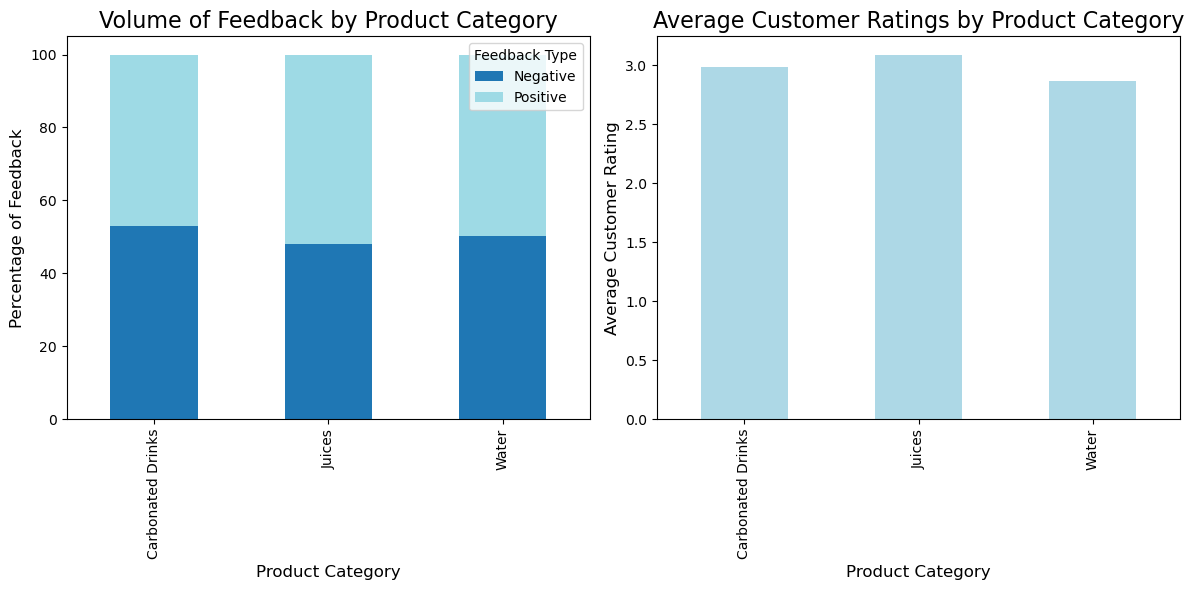

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as `data`

# Calculate the total volume of feedback by product category and feedback type
feedback_summary = data.groupby(['product_category', 'feedback_type'])['volume_of_feedback'].sum().unstack(fill_value=0)

# Calculate the percentage of feedback
feedback_percentage = feedback_summary.div(feedback_summary.sum(axis=1), axis=0) * 100

# Calculate the average customer rating by product category
average_rating = data.groupby('product_category')['customer_rating'].mean()

# Create a figure and axes for the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the feedback distribution (stacked bar chart)
feedback_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20', ax=ax1)
ax1.set_ylabel('Percentage of Feedback', fontsize=12)
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_title('Volume of Feedback by Product Category', fontsize=16)
ax1.legend(title='Feedback Type')

# Plot the average customer rating (bar chart)
average_rating.plot(kind='bar', color='lightblue', ax=ax2)
ax2.set_ylabel('Average Customer Rating', fontsize=12)
ax2.set_xlabel('Product Category', fontsize=12)
ax2.set_title('Average Customer Ratings by Product Category', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


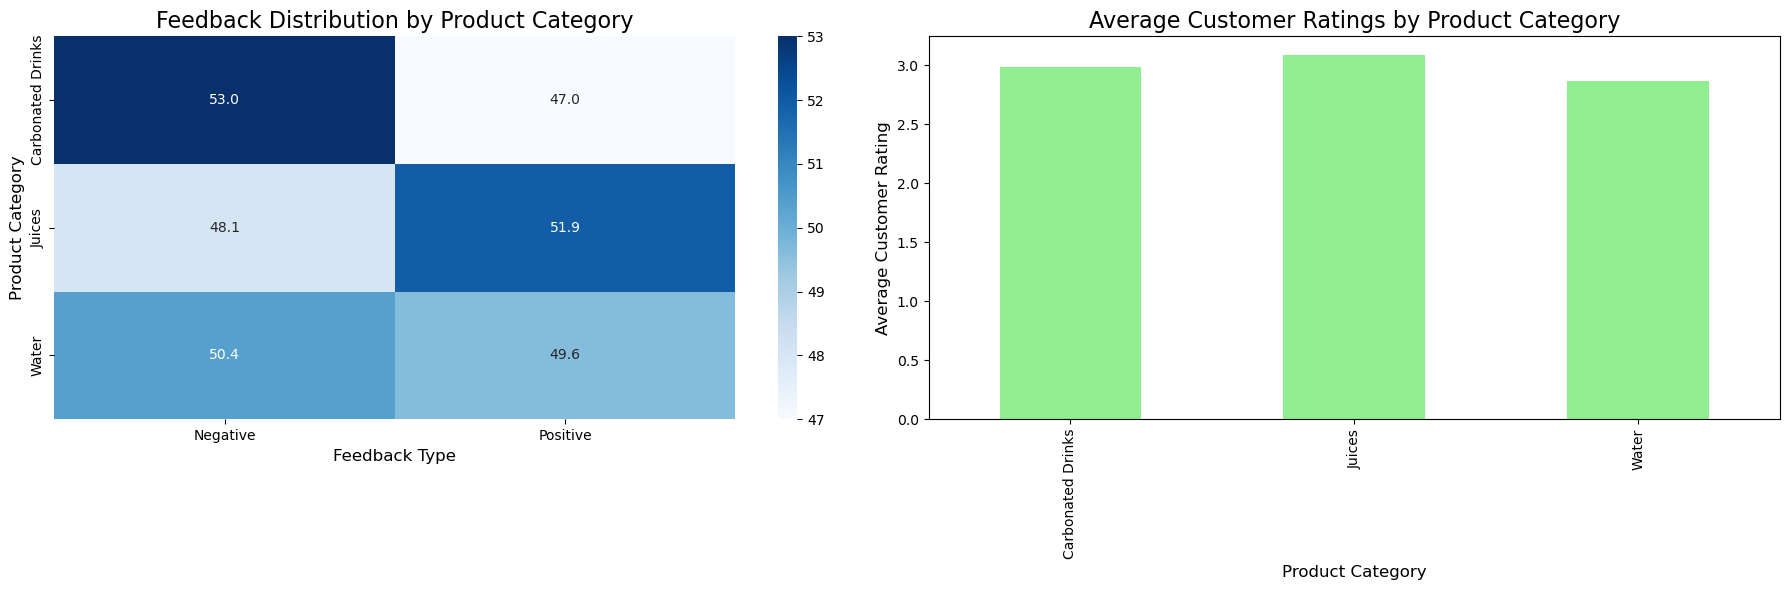

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as `data`

# Calculate the total volume of feedback by product category and feedback type
feedback_summary = data.groupby(['product_category', 'feedback_type'])['volume_of_feedback'].sum().unstack(fill_value=0)

# Calculate the percentage of feedback
feedback_percentage = feedback_summary.div(feedback_summary.sum(axis=1), axis=0) * 100

# Calculate the average customer rating by product category
average_rating = data.groupby('product_category')['customer_rating'].mean()

# Create a figure and axes for the two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the feedback distribution (heatmap)
sns.heatmap(feedback_percentage, annot=True, cmap='Blues', fmt='.1f', cbar=True, ax=ax1)
ax1.set_title('Feedback Distribution by Product Category', fontsize=16)
ax1.set_xlabel('Feedback Type', fontsize=12)
ax1.set_ylabel('Product Category', fontsize=12)

# Plot the average customer rating (bar chart)
average_rating.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_ylabel('Average Customer Rating', fontsize=12)
ax2.set_xlabel('Product Category', fontsize=12)
ax2.set_title('Average Customer Ratings by Product Category', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


# Visualization 3: Average Competitor Market Share by Zone

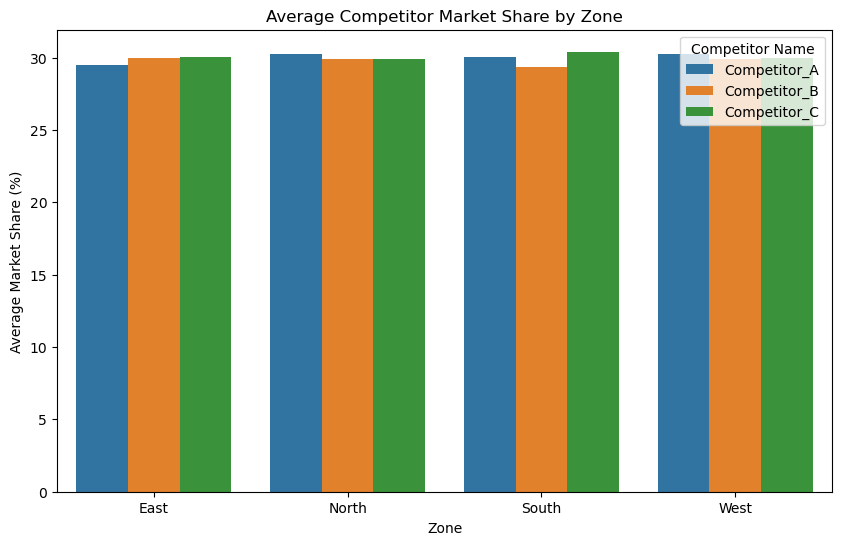

In [5]:

avg_market_share = data.groupby(['zone', 'competitor_name'])['competitor_market_share'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='zone', y='competitor_market_share', hue='competitor_name', data=avg_market_share)
plt.title('Average Competitor Market Share by Zone')
plt.ylabel('Average Market Share (%)')
plt.xlabel('Zone')
plt.legend(title='Competitor Name')
plt.show()

# Visualization 4: Marketing Effectiveness (Averaged)

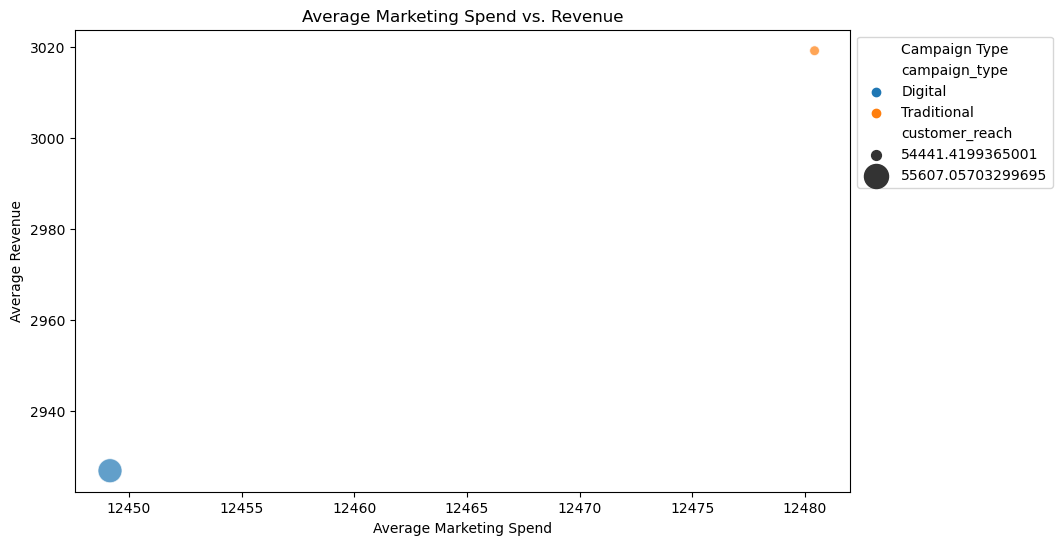

In [6]:

avg_marketing = data.groupby('campaign_type')[['marketing_spend', 'revenue', 'customer_reach']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='marketing_spend', y='revenue', size='customer_reach', hue='campaign_type', data=avg_marketing, sizes=(50, 300), alpha=0.7)
plt.title('Average Marketing Spend vs. Revenue')
plt.ylabel('Average Revenue')
plt.xlabel('Average Marketing Spend')
plt.legend(title='Campaign Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Visualization 5: Zone vs. Product Category (Heatmap with Percentages)

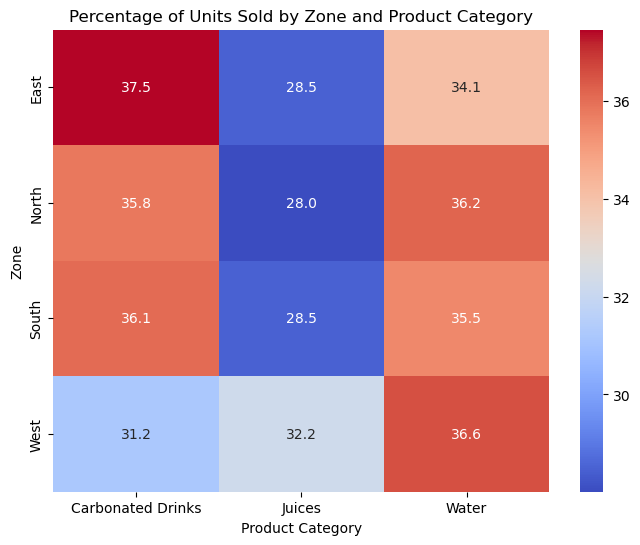

In [7]:

units_sold_summary = data.groupby(['zone', 'product_category'])['units_sold'].sum().unstack(fill_value=0)
units_sold_percentage = units_sold_summary.div(units_sold_summary.sum(axis=1), axis=0) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(units_sold_percentage, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Percentage of Units Sold by Zone and Product Category')
plt.ylabel('Zone')
plt.xlabel('Product Category')
plt.show()

# Visualization 6: Profit Analysis (Averaged Waterfall Chart)

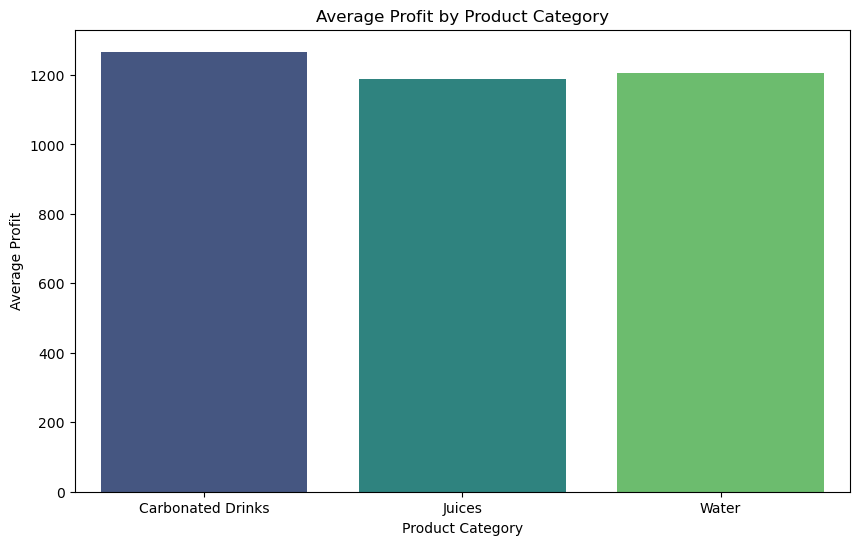

In [8]:

avg_profit_by_category = data.groupby('product_category')['profit'].mean()
categories = avg_profit_by_category.index.tolist()
avg_profits = avg_profit_by_category.values

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=avg_profits, palette='viridis')
plt.title('Average Profit by Product Category')
plt.ylabel('Average Profit')
plt.xlabel('Product Category')
plt.show()

# Visualization 7: Customer Rating Distribution (Averaged)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


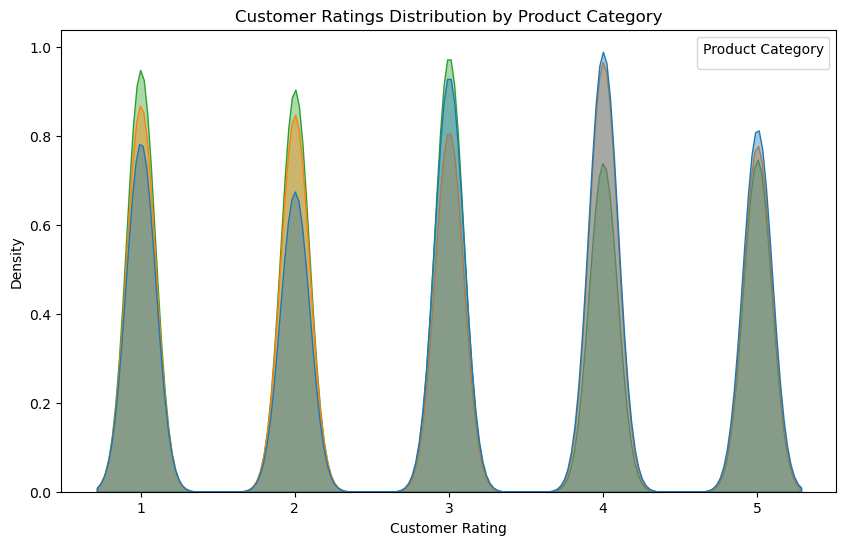

In [9]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='customer_rating', hue='product_category', fill=True, common_norm=False, alpha=0.4)
plt.title('Customer Ratings Distribution by Product Category')
plt.ylabel('Density')
plt.xlabel('Customer Rating')
plt.legend(title='Product Category')
plt.show()

In [10]:
print("Key Metrics:")
print(f"Top Performing Product by Average Revenue: {data.groupby('product_category')['revenue'].mean().idxmax()}")
print(f"Top Performing Zone by Average Profit: {data.groupby('zone')['profit'].mean().idxmax()}")
print(f"Competitor with Highest Average Market Share: {data.groupby('competitor_name')['competitor_market_share'].mean().idxmax()}")

Key Metrics:
Top Performing Product by Average Revenue: Carbonated Drinks
Top Performing Zone by Average Profit: South
Competitor with Highest Average Market Share: Competitor_C


In [11]:
# Grouped Metrics
avg_metrics = data.groupby(['country', 'product_category']).agg({
    'revenue': 'mean',
    'profit': 'mean',
    'profit_margin': 'mean',
    'units_sold': 'mean',
    'customer_rating': 'mean'
}).reset_index()

# Competitor Market Share
competitor_metrics = data.groupby(['competitor_name', 'zone']).agg({
    'competitor_market_share': 'mean'
}).reset_index()

# Feedback Distribution
feedback_metrics = data.groupby(['product_category', 'feedback_type'])['volume_of_feedback'].sum().unstack(fill_value=0)
feedback_percentage = feedback_metrics.div(feedback_metrics.sum(axis=1), axis=0) * 100

# Campaign Effectiveness
marketing_metrics = data.groupby('campaign_type').agg({
    'marketing_spend': 'mean',
    'revenue': 'mean',
    'profit': 'mean',
    'customer_reach': 'mean'
}).reset_index()

# Key Insights
top_product = avg_metrics.groupby('product_category')['profit'].mean().idxmax()
top_country = avg_metrics.groupby('country')['profit'].mean().idxmax()
top_zone = avg_metrics.groupby('country')['units_sold'].mean().idxmax()
top_competitor = competitor_metrics.groupby('competitor_name')['competitor_market_share'].mean().idxmax()

# High Negative Feedback
negative_feedback = feedback_percentage.loc[:, 'Negative'].idxmax()

# Low-Rating Product Category
low_rating_category = avg_metrics.groupby('product_category')['customer_rating'].mean().idxmin()

# Print Metrics and Insights
print("\n**Key Metrics and Insights**\n")
print(f"1. Top Performing Product by Profit: {top_product}")
print(f"2. Top Country by Profit: {top_country}")
print(f"3. Zone with Most Units Sold: {top_zone}")
print(f"4. Competitor with Highest Market Share: {top_competitor}")
print(f"5. Product Category with Most Negative Feedback: {negative_feedback}")
print(f"6. Lowest Rated Product Category: {low_rating_category}")

print("\n**Campaign Effectiveness**")
print(marketing_metrics)

print("\n**Actionable Insights**")
# Actionable Insights based on Analysis

# Product Insights
print("1. Focus marketing and sales efforts on the top-performing product category.")
print(f"   - {top_product} generates the highest average profit.")
print(f"   - Address concerns in {low_rating_category} as it has the lowest customer rating.")

# Country Insights
print(f"2. Expand operations in {top_country} as it generates the highest average profit.")
print(f"   - Tailor strategies for {top_zone} since it has the highest unit sales.")

# Competitor Insights
print(f"3. Analyze {top_competitor}'s strategy in zones where their market share dominates.")
print("   - Investigate how pricing, marketing, or distribution strategies are impacting their performance.")

# Feedback Insights
print(f"4. Focus on reducing negative feedback in {negative_feedback} category.")
print("   - Conduct surveys to identify and address customer dissatisfaction.")

# Campaign Effectiveness Insights
print("5. Optimize marketing spend on campaigns that yield higher customer reach and revenue.")



**Key Metrics and Insights**

1. Top Performing Product by Profit: Carbonated Drinks
2. Top Country by Profit: India
3. Zone with Most Units Sold: USA
4. Competitor with Highest Market Share: Competitor_C
5. Product Category with Most Negative Feedback: Carbonated Drinks
6. Lowest Rated Product Category: Water

**Campaign Effectiveness**
  campaign_type  marketing_spend      revenue       profit  customer_reach
0       Digital     12449.153287  2926.973681  1196.317001    55607.057033
1   Traditional     12480.431087  3019.098334  1250.593972    54441.419937

**Actionable Insights**
1. Focus marketing and sales efforts on the top-performing product category.
   - Carbonated Drinks generates the highest average profit.
   - Address concerns in Water as it has the lowest customer rating.
2. Expand operations in India as it generates the highest average profit.
   - Tailor strategies for USA since it has the highest unit sales.
3. Analyze Competitor_C's strategy in zones where their mark

In [20]:
# Calculate Revenue and Profit by Product Category
revenue_profit = df.groupby('product_category').agg(
    total_revenue=('revenue', 'sum'),
    total_cost=('cost_of_goods_sold', 'sum')
).reset_index()
revenue_profit['profit'] = revenue_profit['total_revenue'] - revenue_profit['total_cost']

# Plot Revenue vs Profit Comparison by Product Category
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='product_category', y='total_revenue', data=revenue_profit, color='skyblue', label='Revenue', ax=ax1)
ax1.set_ylabel('Revenue', fontsize=12)

# Secondary axis for Profit
ax2 = ax1.twinx()
sns.lineplot(x='product_category', y='profit', data=revenue_profit, color='red', marker='o', label='Profit', ax=ax2)
ax2.set_ylabel('Profit', fontsize=12)

plt.title('Revenue and Profit Comparison by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


NameError: name 'df' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Replace 'dataset.csv' with the actual file name
df = pd.read_csv('Cleaned_Command_Centre_Dataset.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [3]:
def calculate_profit(row):
    return row['revenue'] - row['cost_of_goods_sold']

def calculate_profit_margin(row):
    return (row['revenue'] - row['cost_of_goods_sold']) / row['revenue'] * 100

# Add Profit and Profit Margin columns
df['profit'] = df.apply(calculate_profit, axis=1)
df['profit_margin'] = df.apply(calculate_profit_margin, axis=1)

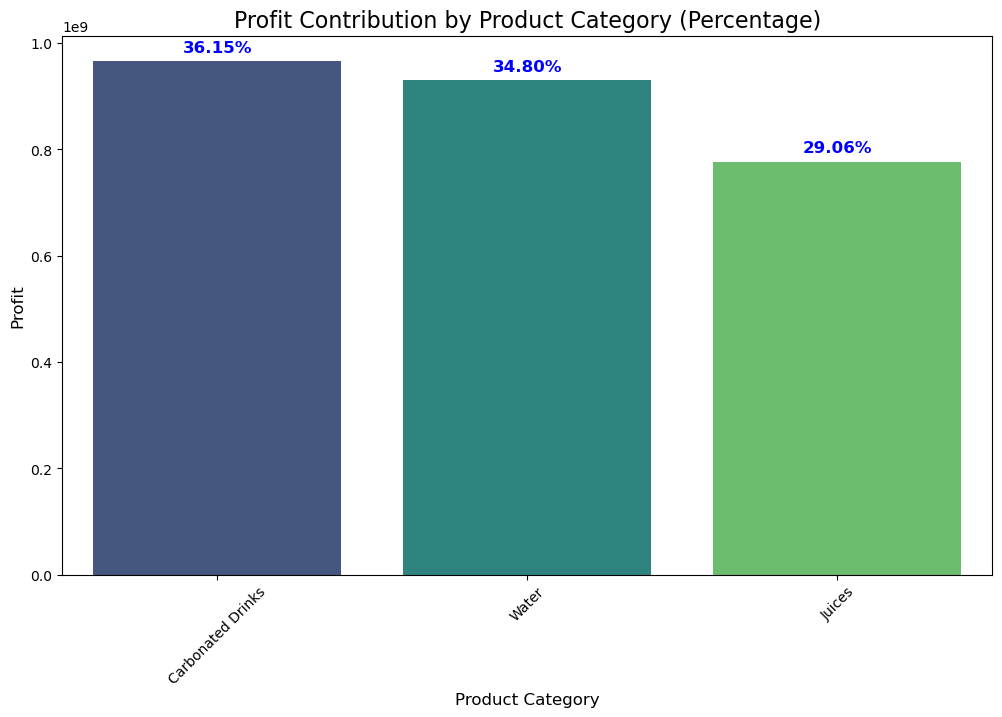

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as `df`

# Profit contribution by product category
profit_by_category = df.groupby('product_category').agg(
    total_profit=('revenue', 'sum'),
    total_cost=('cost_of_goods_sold', 'sum')
).reset_index()
profit_by_category['profit'] = profit_by_category['total_profit'] - profit_by_category['total_cost']

# Calculate the total profit across all product categories
total_profit = profit_by_category['profit'].sum()

# Calculate the percentage contribution of each product category's profit
profit_by_category['profit_percentage'] = (profit_by_category['profit'] / total_profit) * 100

# Sort the categories by profit
profit_by_category = profit_by_category.sort_values('profit', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=profit_by_category, x='product_category', y='profit', palette='viridis')

# Add the exact values (percentage) inside the bars
for p in ax.patches:
    percentage = (p.get_height() / total_profit) * 100  # Calculate percentage
    ax.annotate(f'{percentage:,.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='blue', fontweight='bold', 
                xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Profit Contribution by Product Category (Percentage)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.show()














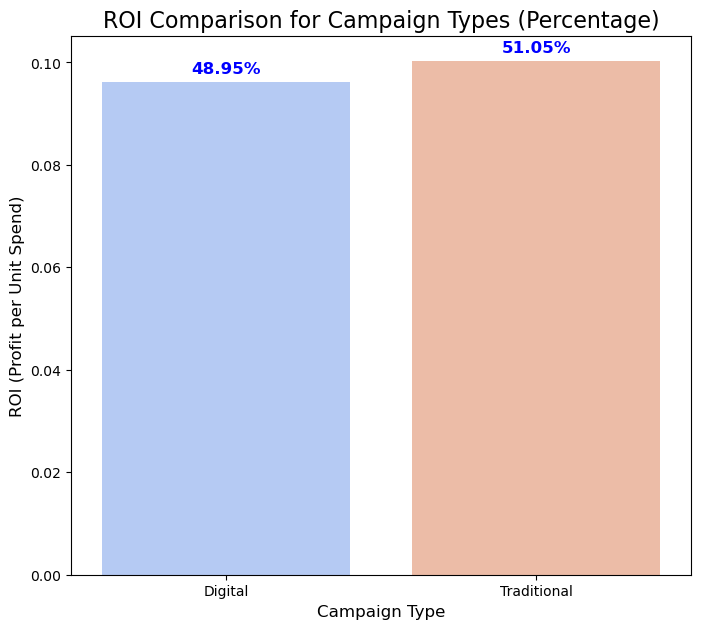

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as `df`

# Calculate the profit
df['profit'] = df['revenue'] - df['cost_of_goods_sold']

# ROI analysis by campaign type
campaign_effectiveness = df.groupby('campaign_type').agg(
    total_profit=('profit', 'sum'),
    total_marketing_spend=('marketing_spend', 'sum')
).reset_index()

# Calculate ROI
campaign_effectiveness['ROI'] = campaign_effectiveness['total_profit'] / campaign_effectiveness['total_marketing_spend']

# Calculate the total ROI across all campaign types
total_ROI = campaign_effectiveness['ROI'].sum()

# Calculate the percentage contribution of each campaign's ROI
campaign_effectiveness['ROI_percentage'] = (campaign_effectiveness['ROI'] / total_ROI) * 100

# Create the bar plot
plt.figure(figsize=(8, 7))
ax = sns.barplot(data=campaign_effectiveness, x='campaign_type', y='ROI', palette='coolwarm')

# Add the exact values (ROI percentage) inside the bars
for p in ax.patches:
    percentage = (p.get_height() / total_ROI) * 100  # Calculate percentage contribution to total ROI
    ax.annotate(f'{percentage:,.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='blue', fontweight='bold', 
                xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('ROI Comparison for Campaign Types (Percentage)', fontsize=16)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('ROI (Profit per Unit Spend)', fontsize=12)
plt.show()


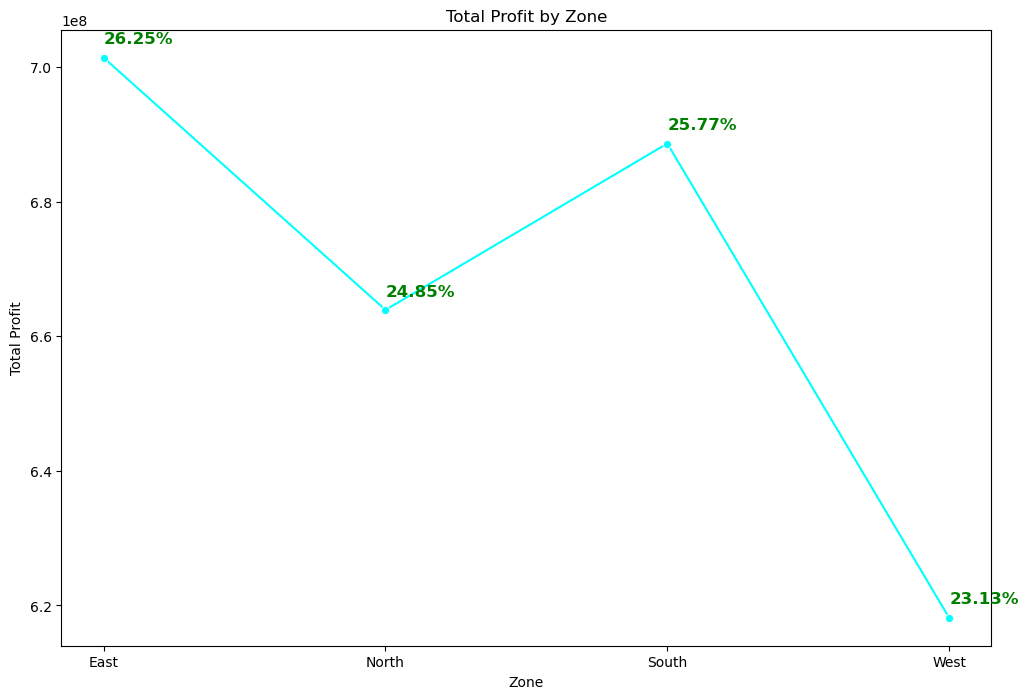

In [49]:
# Line plot for profit
fig, ax2 = plt.subplots(figsize=(12, 8))
sns.lineplot(data=zone_analysis, x='zone', y='total_profit', marker='o', color='aqua', ax=ax2)

# Add annotations for profit percentage
for i, point in enumerate(ax2.lines[0].get_xydata()):
    ax2.annotate(f'{zone_analysis["profit_percentage"].iloc[i]:,.2f}%', 
                 (point[0], point[1]), 
                 fontsize=12, color='green', fontweight='bold', 
                 xytext=(0, 10), textcoords='offset points')

ax2.set_title('Total Profit by Zone')
ax2.set_xlabel('Zone')
ax2.set_ylabel('Total Profit')
plt.show()


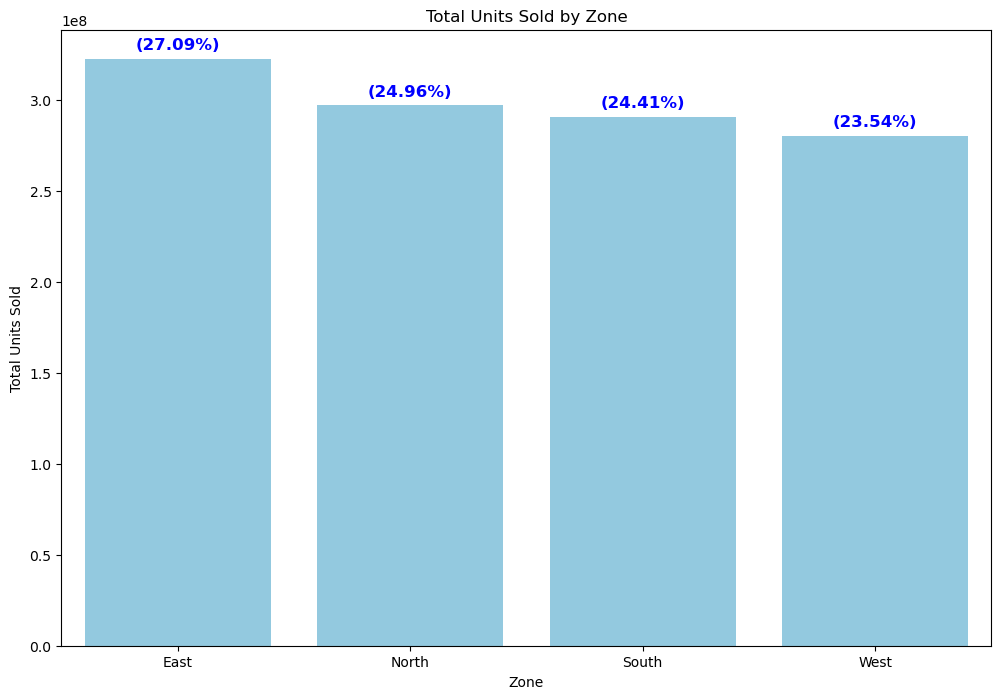

In [51]:
# Bar plot for units sold
fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(data=zone_analysis, x='zone', y='total_units', color='skyblue', ax=ax1)

# Add annotations for units percentage
for p in ax1.patches:
    ax1.annotate(f'({zone_analysis["units_percentage"].iloc[ax1.patches.index(p)]:,.2f}%)',
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='blue', fontweight='bold', 
                 xytext=(0, 10), textcoords='offset points')

ax1.set_title('Total Units Sold by Zone')
ax1.set_xlabel('Zone')
ax1.set_ylabel('Total Units Sold')
plt.show()


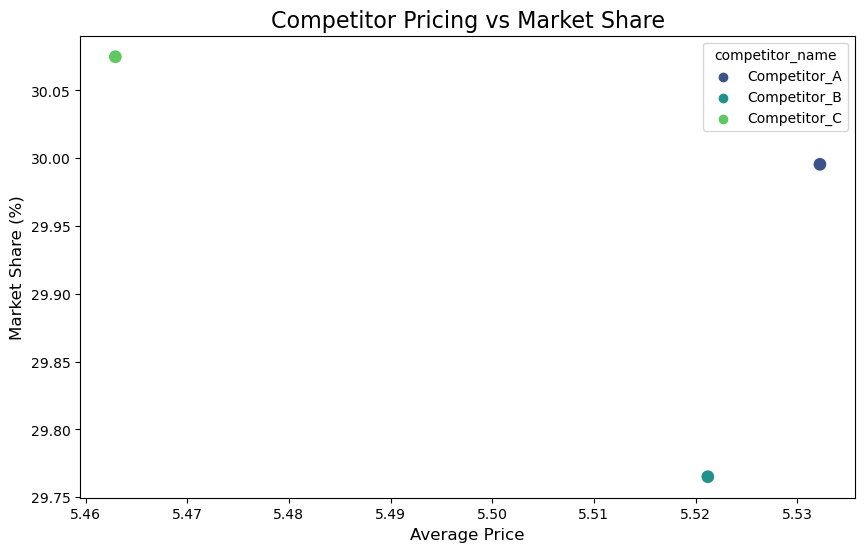

In [14]:
### 4. Competitor Pricing and Market Share
competitor_analysis = df.groupby('competitor_name').agg(
    avg_price=('competitor_price', 'mean'),
    avg_market_share=('competitor_market_share', 'mean')
).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=competitor_analysis, x='avg_price', y='avg_market_share', hue='competitor_name', palette='viridis', s=100)
plt.title('Competitor Pricing vs Market Share', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.show()


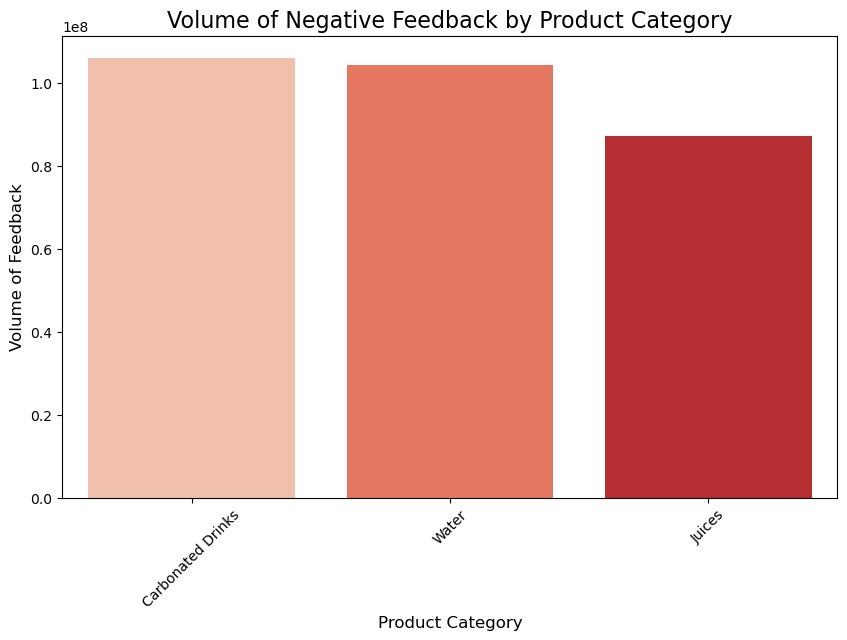

In [15]:
### 5. Negative Feedback Analysis by Product Category
negative_feedback = df[df['feedback_type'] == 'Negative'].groupby('product_category').agg(
    volume_of_feedback=('volume_of_feedback', 'sum')
).reset_index().sort_values('volume_of_feedback', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=negative_feedback, x='product_category', y='volume_of_feedback', palette='Reds')
plt.title('Volume of Negative Feedback by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Volume of Feedback', fontsize=12)
plt.xticks(rotation=45)
plt.show()





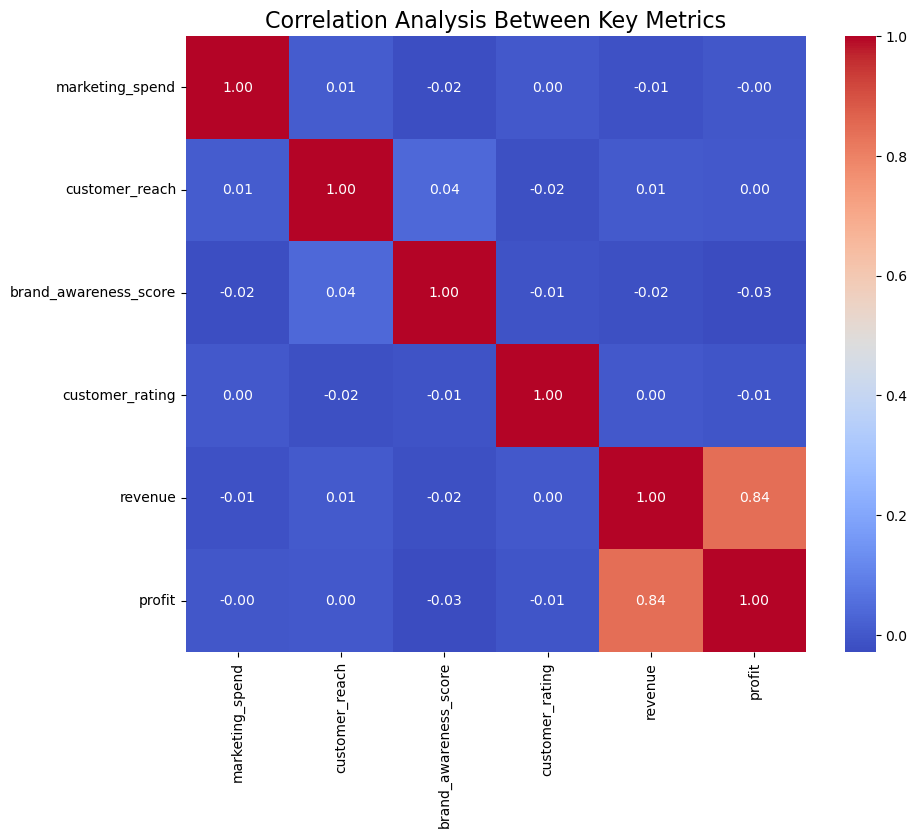

In [12]:
### 6. Correlation Analysis
correlation_columns = ['marketing_spend', 'customer_reach', 'brand_awareness_score', 'customer_rating', 'revenue', 'profit']
correlation_data = df[correlation_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis Between Key Metrics', fontsize=16)
plt.show()

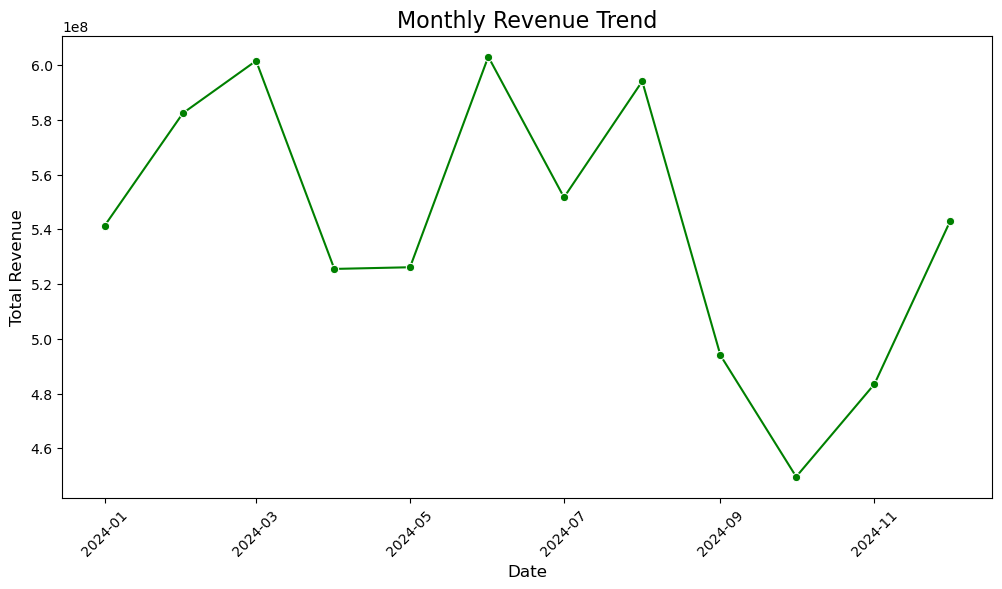

In [13]:
### 7. Time Series Analysis for Revenue
df['date'] = pd.to_datetime(df['date'])  # Ensure date column is datetime format
time_series = df.groupby(df['date'].dt.to_period('M')).agg(total_revenue=('revenue', 'sum')).reset_index()
time_series['date'] = time_series['date'].dt.to_timestamp()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series, x='date', y='total_revenue', marker='o', color='green')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [43]:
import pandas as pd

# Assuming the DataFrame is already loaded as `df`

# 1. Top Performing Product by Profit (Percentage Contribution)
profit_by_product = df.groupby('product_category').agg(
    total_profit=('revenue', 'sum'),
    total_cost=('cost_of_goods_sold', 'sum')
).reset_index()
profit_by_product['profit'] = profit_by_product['total_profit'] - profit_by_product['total_cost']
profit_by_product['profit_percentage'] = (profit_by_product['profit'] / profit_by_product['profit'].sum()) * 100

# Sort by profit and find the top-performing product
top_product_by_profit = profit_by_product.sort_values('profit_percentage', ascending=False).iloc[0]



# 7. Top Product Category by Revenue
category_revenue = df.groupby('product_category').agg(
    total_revenue=('revenue', 'sum')
).reset_index()
top_category_by_revenue = category_revenue.sort_values('total_revenue', ascending=False).iloc[0]

# 8. Top Zone by Profit
zone_profit = df.groupby('zone').agg(
    total_revenue=('revenue', 'sum'),
    total_cost=('cost_of_goods_sold', 'sum')
).reset_index()
zone_profit['profit'] = zone_profit['total_revenue'] - zone_profit['total_cost']
top_zone_by_profit = zone_profit.sort_values('profit', ascending=False).iloc[0]

# 9. Product Category with Highest Units Sold
product_units_sold = df.groupby('product_category').agg(
    total_units_sold=('units_sold', 'sum')
).reset_index()
top_product_by_units_sold = product_units_sold.sort_values('total_units_sold', ascending=False).iloc[0]

# 10. Region with Highest Revenue
region_revenue = df.groupby('zone').agg(
    total_revenue=('revenue', 'sum')
).reset_index()
top_region_by_revenue = region_revenue.sort_values('total_revenue', ascending=False).iloc[0]

# 11. Percentage Contribution of Each Product to Total Profit
profit_by_product['profit_percentage'] = (profit_by_product['profit'] / profit_by_product['profit'].sum()) * 100

# Display all metrics
metrics = {
    'Top Performing Product by Profit': top_product_by_profit,
    'Top Country by Profit': top_country_by_profit,
    'Zone with Most Units Sold': top_zone_by_units,
    'Competitor with Highest Market Share': top_competitor_by_market_share,
#     'Product Category with Most Negative Feedback': top_product_by_negative_feedback,
#     'Lowest Rated Product Category': lowest_rated_product_category,
    'Top Product Category by Revenue': top_category_by_revenue,
    'Top Zone by Profit': top_zone_by_profit,
    'Product Category with Highest Units Sold': top_product_by_units_sold,
    'Region with Highest Revenue': top_region_by_revenue
}

# Displaying all metrics
for key, value in metrics.items():
    print(f"{key}: {value}")


Top Performing Product by Profit: product_category     Carbonated Drinks
total_profit             2298087579.79
total_cost               1332205827.34
profit                    965881752.45
profit_percentage            36.145917
Name: 0, dtype: object
Top Country by Profit: country               Germany
total_profit    1355964252.96
total_cost        801347031.9
profit           554617221.06
Name: 2, dtype: object
Zone with Most Units Sold: zone                     East
total_units_sold    322602423
Name: 0, dtype: object
Competitor with Highest Market Share: Competitor_C
Top Product Category by Revenue: product_category    Carbonated Drinks
total_revenue           2298087579.79
Name: 0, dtype: object
Top Zone by Profit: zone                      East
total_revenue    1730121243.02
total_cost        1028708006.2
profit            701413236.82
Name: 0, dtype: object
Product Category with Highest Units Sold: product_category        Water
total_units_sold    423105465
Name: 2, dtype: obje

In [26]:
import pandas as pd

# Calculate Profit for Analysis
df['profit'] = df['revenue'] - df['cost_of_goods_sold'] - df['marketing_spend']

# 1. Top Performing Product by Profit
top_product = df.groupby('product_category')['profit'].sum().idxmax()
top_product_profit = df.groupby('product_category')['profit'].sum().max()

# 2. Top Country by Profit
top_country = df.groupby('country')['profit'].sum().idxmax()
top_country_profit = df.groupby('country')['profit'].sum().max()

# 3. Zone with Most Units Sold
top_zone = df.groupby('zone')['units_sold'].sum().idxmax()
top_zone_units_sold = df.groupby('zone')['units_sold'].sum().max()

# 4. Competitor with Highest Market Share
top_competitor = df.groupby('competitor_name')['competitor_market_share'].max().idxmax()
top_competitor_share = df.groupby('competitor_name')['competitor_market_share'].max().max()

# 5. Product Category with Most Negative Feedback
negative_feedback_category = df[df['feedback_type'] == 'Negative'].groupby('product_category')['volume_of_feedback'].sum().idxmax()
negative_feedback_volume = df[df['feedback_type'] == 'Negative'].groupby('product_category')['volume_of_feedback'].sum().max()

# 6. Lowest Rated Product Category
lowest_rated_category = df.groupby('product_category')['customer_rating'].mean().idxmin()
lowest_rating = df.groupby('product_category')['customer_rating'].mean().min()

# 7. Campaign ROI Analysis
campaign_roi = df.groupby('campaign_type').agg(
    marketing_spend=('marketing_spend', 'sum'),
    revenue=('revenue', 'sum'),
    profit=('profit', 'sum'),
    customer_reach=('customer_reach', 'sum')
).reset_index()
campaign_roi['ROI'] = campaign_roi['profit'] / campaign_roi['marketing_spend']

# 8. Monthly Revenue Trend
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()

# 9. Correlation Analysis
correlation_matrix = df[['revenue', 'marketing_spend', 'customer_reach', 'brand_awareness_score', 'profit']].corr()

# Results
print(f"1. Top Performing Product by Profit: {top_product} with Profit = {top_product_profit}")
print(f"2. Top Country by Profit: {top_country} with Profit = {top_country_profit}")
print(f"3. Zone with Most Units Sold: {top_zone} with Units Sold = {top_zone_units_sold}")
print(f"4. Competitor with Highest Market Share: {top_competitor} with Share = {top_competitor_share}")
print(f"5. Product Category with Most Negative Feedback: {negative_feedback_category} with Feedback Volume = {negative_feedback_volume}")
print(f"6. Lowest Rated Product Category: {lowest_rated_category} with Rating = {lowest_rating}")
print("\n7. Campaign ROI Analysis:")
print(campaign_roi)
print("\n8. Monthly Revenue Trend:")
print(monthly_revenue)
print("\n9. Correlation Matrix:")
print(correlation_matrix)


1. Top Performing Product by Profit: Juices with Profit = -7417078393.06
2. Top Country by Profit: India with Profit = -4659528289.05
3. Zone with Most Units Sold: East with Units Sold = 322602423
4. Competitor with Highest Market Share: Competitor_C with Share = 50.0
5. Product Category with Most Negative Feedback: Carbonated Drinks with Feedback Volume = 106077983
6. Lowest Rated Product Category: Water with Rating = 2.868185739396652

7. Campaign ROI Analysis:
  campaign_type  marketing_spend       revenue        profit  customer_reach  \
0       Digital     1.431370e+10  3.365355e+09 -1.293821e+10     63935492786   
1   Traditional     1.294036e+10  3.130358e+09 -1.164368e+10     56447695144   

        ROI  
0 -0.903904  
1 -0.899796  

8. Monthly Revenue Trend:
      month       revenue
0   2024-01  5.413303e+08
1   2024-02  5.824287e+08
2   2024-03  6.015575e+08
3   2024-04  5.255209e+08
4   2024-05  5.261311e+08
5   2024-06  6.030537e+08
6   2024-07  5.516662e+08
7   2024-08  5

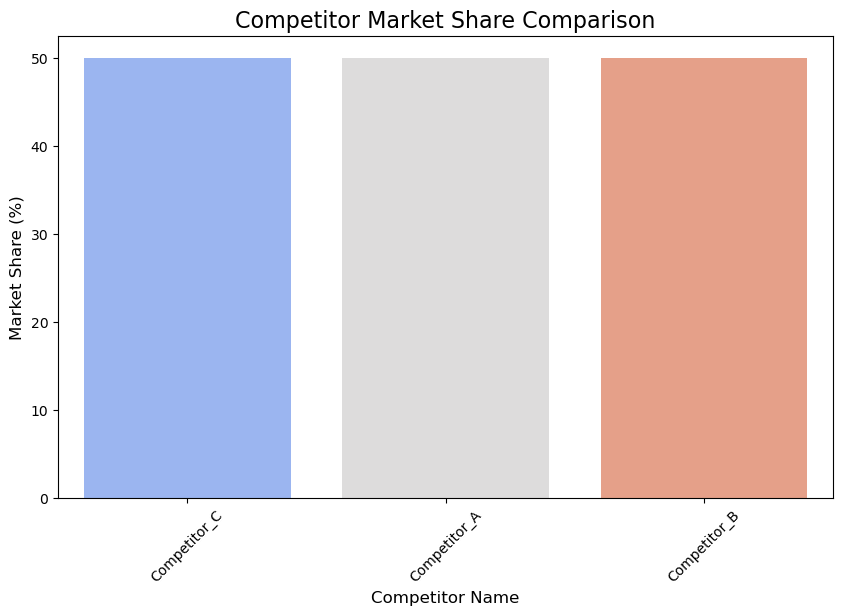

The competitor with the highest market share is 'Competitor_C' with a market share of 50.00%.


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the competitor with the highest market share
top_competitor = df.groupby('competitor_name')['competitor_market_share'].max().idxmax()
top_competitor_share = df.groupby('competitor_name')['competitor_market_share'].max().max()

# Plotting the competitor market share for all competitors
competitor_market_share = df.groupby('competitor_name')['competitor_market_share'].max().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=competitor_market_share.index, y=competitor_market_share.values, palette='coolwarm')
plt.title('Competitor Market Share Comparison', fontsize=16)
plt.xlabel('Competitor Name', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Print the competitor with the highest market share and the share value
print(f"The competitor with the highest market share is '{top_competitor}' with a market share of {top_competitor_share:.2f}%.")


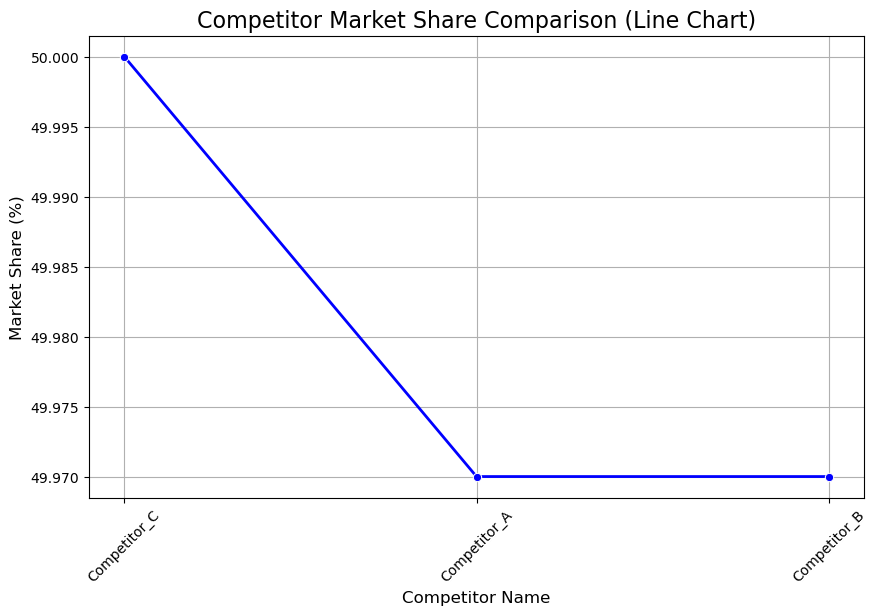

The competitor with the highest market share is 'Competitor_C' with a market share of 50.00%.


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the competitor with the highest market share
top_competitor = df.groupby('competitor_name')['competitor_market_share'].max().idxmax()
top_competitor_share = df.groupby('competitor_name')['competitor_market_share'].max().max()

# Calculate the market share for each competitor
competitor_market_share = df.groupby('competitor_name')['competitor_market_share'].max().sort_values(ascending=False)

# Plotting the line chart for competitor market share
plt.figure(figsize=(10, 6))
sns.lineplot(x=competitor_market_share.index, y=competitor_market_share.values, marker='o', color='b', linewidth=2)
plt.title('Competitor Market Share Comparison (Line Chart)', fontsize=16)
plt.xlabel('Competitor Name', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the competitor with the highest market share and the share value
print(f"The competitor with the highest market share is '{top_competitor}' with a market share of {top_competitor_share:.2f}%.")
